In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
import tensorflow.keras.layers as tfl
import seaborn as sns
from PIL import Image

monkeypox


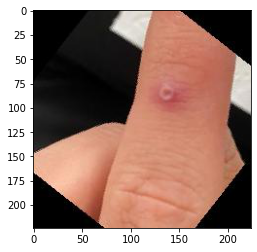

healthy


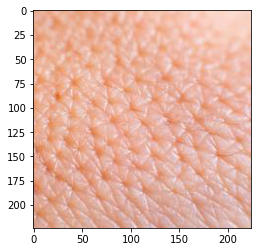

chickenpox


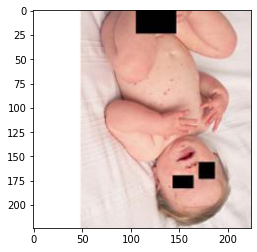

In [3]:
train_images = os.listdir('../input/monkeypox-skin-lesion-classification')
for folder in train_images :
    images = os.listdir('../input/monkeypox-skin-lesion-classification/'+str(folder))
    print(folder)
    img = mpimg.imread('../input/monkeypox-skin-lesion-classification/'+str(folder)+'/'+images[0])
    imgplot = plt.imshow(img)
    plt.show()

In [4]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [5]:
Accuracy = {}

* 4 hidden layers = 1024,512,128,64
* img_size = 400x400
* introduced batch normalization and dropout
* Accuracy obtained : 96.80%

In [6]:
labels = os.listdir('../input/monkeypox-skin-lesion-classification')
img_size = 224
train_dataset = image_dataset_from_directory(
    '../input/monkeypox-skin-lesion-classification',
    image_size = (img_size,img_size),
    batch_size = 32,
    shuffle=True,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.2,
    subset='training',
    seed=22
)
val_dataset = image_dataset_from_directory(
    '../input/monkeypox-skin-lesion-classification',
    image_size = (img_size,img_size),
    batch_size = 32,
    shuffle=False,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.2,
    subset='validation',
    seed=22
)
def get_model(base, preprocessor, img_size):    
    inputs = tf.keras.Input(shape=(img_size,img_size,3))
    x = RandomFlip('horizontal')(inputs)
    x = preprocessor(x)
    x = base(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(512, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(128, activation='relu')(x)
    x = tfl.Dropout(0.15)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(64, activation='relu')(x)
    x = tfl.Dropout(0.3)(x)
    x = tfl.BatchNormalization()(x)
    outputs = tfl.Dense(3, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model


Found 21026 files belonging to 3 classes.
Using 16821 files for training.


2022-08-30 21:47:45.450598: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Found 21026 files belonging to 3 classes.
Using 4205 files for validation.


In [7]:
preprocess_input = tf.keras.applications.resnet.preprocess_input
pre_trained_model = tf.keras.applications.ResNet50(input_shape=(img_size,img_size,3),
                                         include_top=False,
                                         weights='imagenet')
pre_trained_model.trainable = False
model = get_model(pre_trained_model, preprocess_input, img_size)


94781440/94765736 [==============================] - 1s 0us/step


In [8]:
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)


In [9]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    verbose=1)


Epoch 1/10


2022-08-30 21:47:54.340748: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 22:06 - loss: 1.2173 - accuracy: 0.4766

Cleanup called...


  9/526 [..............................] - ETA: 22:49 - loss: 1.0655 - accuracy: 0.5486

Cleanup called...


 10/526 [..............................] - ETA: 22:40 - loss: 1.0302 - accuracy: 0.5531

Cleanup called...


 12/526 [..............................] - ETA: 22:24 - loss: 1.0105 - accuracy: 0.5677

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 22:12 - loss: 0.9550 - accuracy: 0.5893

Cleanup called...


 15/526 [..............................] - ETA: 22:07 - loss: 0.9567 - accuracy: 0.5917

Cleanup called...


 16/526 [..............................] - ETA: 22:01 - loss: 0.9343 - accuracy: 0.5957

Cleanup called...


 20/526 [>.............................] - ETA: 22:00 - loss: 0.8586 - accuracy: 0.6313

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 21:52 - loss: 0.8175 - accuracy: 0.6508

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 21:36 - loss: 0.7918 - accuracy: 0.6667

Cleanup called...


 29/526 [>.............................] - ETA: 21:35 - loss: 0.7839 - accuracy: 0.6681

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 21:30 - loss: 0.7800 - accuracy: 0.6724

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 21:22 - loss: 0.7637 - accuracy: 0.6809

Cleanup called...


 40/526 [=>............................] - ETA: 20:58 - loss: 0.7165 - accuracy: 0.7016

Cleanup called...


 41/526 [=>............................] - ETA: 20:55 - loss: 0.7063 - accuracy: 0.7058

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 20:58 - loss: 0.6974 - accuracy: 0.7098

Cleanup called...


 47/526 [=>............................] - ETA: 20:41 - loss: 0.6661 - accuracy: 0.7214

Cleanup called...


 48/526 [=>............................] - ETA: 20:38 - loss: 0.6607 - accuracy: 0.7246

Cleanup called...


 51/526 [=>............................] - ETA: 20:28 - loss: 0.6466 - accuracy: 0.7298

Cleanup called...


 54/526 [==>...........................] - ETA: 20:24 - loss: 0.6385 - accuracy: 0.7321

Cleanup called...


 55/526 [==>...........................] - ETA: 20:22 - loss: 0.6373 - accuracy: 0.7347

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 20:11 - loss: 0.6262 - accuracy: 0.7394

Cleanup called...


 69/526 [==>...........................] - ETA: 19:45 - loss: 0.5853 - accuracy: 0.7600

Cleanup called...


 71/526 [===>..........................] - ETA: 19:38 - loss: 0.5792 - accuracy: 0.7623

Cleanup called...


 73/526 [===>..........................] - ETA: 19:33 - loss: 0.5718 - accuracy: 0.7671

Cleanup called...


 74/526 [===>..........................] - ETA: 19:29 - loss: 0.5708 - accuracy: 0.7677

Cleanup called...


 77/526 [===>..........................] - ETA: 19:21 - loss: 0.5624 - accuracy: 0.7715

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 18:58 - loss: 0.5494 - accuracy: 0.7791

Cleanup called...


 95/526 [====>.........................] - ETA: 18:35 - loss: 0.5313 - accuracy: 0.7885

Cleanup called...


 99/526 [====>.........................] - ETA: 18:24 - loss: 0.5215 - accuracy: 0.7926

Cleanup called...


100/526 [====>.........................] - ETA: 18:21 - loss: 0.5213 - accuracy: 0.7928

Cleanup called...


101/526 [====>.........................] - ETA: 18:18 - loss: 0.5171 - accuracy: 0.7946

Cleanup called...


103/526 [====>.........................] - ETA: 18:15 - loss: 0.5115 - accuracy: 0.7961

Cleanup called...


104/526 [====>.........................] - ETA: 18:12 - loss: 0.5088 - accuracy: 0.7972

Cleanup called...


109/526 [=====>........................] - ETA: 17:58 - loss: 0.5022 - accuracy: 0.8005

Cleanup called...


110/526 [=====>........................] - ETA: 17:55 - loss: 0.4999 - accuracy: 0.8009

Cleanup called...


113/526 [=====>........................] - ETA: 17:48 - loss: 0.4929 - accuracy: 0.8042

Cleanup called...


119/526 [=====>........................] - ETA: 17:33 - loss: 0.4867 - accuracy: 0.8075

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 17:19 - loss: 0.4831 - accuracy: 0.8087

Cleanup called...


129/526 [======>.......................] - ETA: 17:07 - loss: 0.4764 - accuracy: 0.8113

Cleanup called...


130/526 [======>.......................] - ETA: 17:04 - loss: 0.4735 - accuracy: 0.8127

Cleanup called...


133/526 [======>.......................] - ETA: 16:56 - loss: 0.4747 - accuracy: 0.8123

Cleanup called...


136/526 [======>.......................] - ETA: 16:47 - loss: 0.4702 - accuracy: 0.8150

Cleanup called...


139/526 [======>.......................] - ETA: 16:39 - loss: 0.4730 - accuracy: 0.8147

Cleanup called...


142/526 [=======>......................] - ETA: 16:32 - loss: 0.4695 - accuracy: 0.8162

Cleanup called...


143/526 [=======>......................] - ETA: 16:30 - loss: 0.4692 - accuracy: 0.8164

Cleanup called...


144/526 [=======>......................] - ETA: 16:27 - loss: 0.4666 - accuracy: 0.8177

Cleanup called...


148/526 [=======>......................] - ETA: 16:16 - loss: 0.4641 - accuracy: 0.8190

Cleanup called...


150/526 [=======>......................] - ETA: 16:10 - loss: 0.4610 - accuracy: 0.8204

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 16:05 - loss: 0.4577 - accuracy: 0.8215

Cleanup called...


157/526 [=======>......................] - ETA: 15:53 - loss: 0.4513 - accuracy: 0.8240

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 15:50 - loss: 0.4491 - accuracy: 0.8248

Cleanup called...


159/526 [========>.....................] - ETA: 15:47 - loss: 0.4480 - accuracy: 0.8253

Cleanup called...


160/526 [========>.....................] - ETA: 15:44 - loss: 0.4466 - accuracy: 0.8258

Cleanup called...


164/526 [========>.....................] - ETA: 15:34 - loss: 0.4437 - accuracy: 0.8274

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 15:32 - loss: 0.4429 - accuracy: 0.8273

Cleanup called...


168/526 [========>.....................] - ETA: 15:24 - loss: 0.4383 - accuracy: 0.8287

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 15:18 - loss: 0.4393 - accuracy: 0.8281

Cleanup called...


174/526 [========>.....................] - ETA: 15:07 - loss: 0.4351 - accuracy: 0.8294

Cleanup called...


176/526 [=========>....................] - ETA: 15:02 - loss: 0.4332 - accuracy: 0.8306

Cleanup called...


177/526 [=========>....................] - ETA: 15:00 - loss: 0.4320 - accuracy: 0.8310

Cleanup called...


179/526 [=========>....................] - ETA: 14:55 - loss: 0.4299 - accuracy: 0.8321

Cleanup called...


184/526 [=========>....................] - ETA: 14:41 - loss: 0.4246 - accuracy: 0.8347

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 14:36 - loss: 0.4231 - accuracy: 0.8357

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 14:33 - loss: 0.4222 - accuracy: 0.8361

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 14:23 - loss: 0.4211 - accuracy: 0.8367

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 14:18 - loss: 0.4193 - accuracy: 0.8376

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 14:15 - loss: 0.4187 - accuracy: 0.8378

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 14:02 - loss: 0.4122 - accuracy: 0.8406

Cleanup called...


200/526 [==========>...................] - ETA: 14:00 - loss: 0.4115 - accuracy: 0.8408

Cleanup called...


202/526 [==========>...................] - ETA: 13:55 - loss: 0.4098 - accuracy: 0.8413

Cleanup called...


203/526 [==========>...................] - ETA: 13:53 - loss: 0.4082 - accuracy: 0.8419

Cleanup called...


205/526 [==========>...................] - ETA: 13:47 - loss: 0.4061 - accuracy: 0.8428

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 13:42 - loss: 0.4051 - accuracy: 0.8433

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 13:31 - loss: 0.4019 - accuracy: 0.8442

Cleanup called...


212/526 [===========>..................] - ETA: 13:29 - loss: 0.4009 - accuracy: 0.8446

Cleanup called...


214/526 [===========>..................] - ETA: 13:23 - loss: 0.3986 - accuracy: 0.8456

Cleanup called...


215/526 [===========>..................] - ETA: 13:21 - loss: 0.3975 - accuracy: 0.8461

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 13:16 - loss: 0.3966 - accuracy: 0.8461

Cleanup called...


219/526 [===========>..................] - ETA: 13:11 - loss: 0.3957 - accuracy: 0.8465

Cleanup called...


220/526 [===========>..................] - ETA: 13:08 - loss: 0.3951 - accuracy: 0.8466

Cleanup called...


221/526 [===========>..................] - ETA: 13:05 - loss: 0.3945 - accuracy: 0.8469

Cleanup called...


222/526 [===========>..................] - ETA: 13:03 - loss: 0.3938 - accuracy: 0.8470

Cleanup called...


223/526 [===========>..................] - ETA: 13:00 - loss: 0.3943 - accuracy: 0.8468

Cleanup called...


225/526 [===========>..................] - ETA: 12:55 - loss: 0.3932 - accuracy: 0.8475

Cleanup called...


226/526 [===========>..................] - ETA: 12:52 - loss: 0.3918 - accuracy: 0.8480

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 12:48 - loss: 0.3894 - accuracy: 0.8491

Cleanup called...


234/526 [============>.................] - ETA: 12:32 - loss: 0.3828 - accuracy: 0.8516

Cleanup called...


239/526 [============>.................] - ETA: 12:18 - loss: 0.3811 - accuracy: 0.8528

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 12:14 - loss: 0.3794 - accuracy: 0.8536

Cleanup called...


252/526 [=============>................] - ETA: 11:45 - loss: 0.3737 - accuracy: 0.8559

Cleanup called...


255/526 [=============>................] - ETA: 11:37 - loss: 0.3723 - accuracy: 0.8562

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 11:34 - loss: 0.3710 - accuracy: 0.8568

Cleanup called...


260/526 [=============>................] - ETA: 11:24 - loss: 0.3683 - accuracy: 0.8579

Cleanup called...


261/526 [=============>................] - ETA: 11:21 - loss: 0.3674 - accuracy: 0.8581

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 11:19 - loss: 0.3676 - accuracy: 0.8579

Cleanup called...


263/526 [==============>...............] - ETA: 11:16 - loss: 0.3675 - accuracy: 0.8581

Cleanup called...


264/526 [==============>...............] - ETA: 11:14 - loss: 0.3666 - accuracy: 0.8584

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 11:09 - loss: 0.3650 - accuracy: 0.8590

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 11:06 - loss: 0.3641 - accuracy: 0.8594

Cleanup called...


273/526 [==============>...............] - ETA: 10:50 - loss: 0.3601 - accuracy: 0.8608

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 10:48 - loss: 0.3597 - accuracy: 0.8609

Cleanup called...


281/526 [===============>..............] - ETA: 10:30 - loss: 0.3571 - accuracy: 0.8620

Cleanup called...


282/526 [===============>..............] - ETA: 10:27 - loss: 0.3564 - accuracy: 0.8624

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 10:22 - loss: 0.3550 - accuracy: 0.8627

Cleanup called...


288/526 [===============>..............] - ETA: 10:11 - loss: 0.3540 - accuracy: 0.8631

Cleanup called...


289/526 [===============>..............] - ETA: 10:09 - loss: 0.3536 - accuracy: 0.8632

Cleanup called...


290/526 [===============>..............] - ETA: 10:07 - loss: 0.3525 - accuracy: 0.8636

Cleanup called...


294/526 [===============>..............] - ETA: 9:56 - loss: 0.3500 - accuracy: 0.8647

Cleanup called...


297/526 [===============>..............] - ETA: 9:48 - loss: 0.3479 - accuracy: 0.8656

Cleanup called...


302/526 [================>.............] - ETA: 9:36 - loss: 0.3461 - accuracy: 0.8668

Cleanup called...


310/526 [================>.............] - ETA: 9:15 - loss: 0.3413 - accuracy: 0.8692

Cleanup called...


312/526 [================>.............] - ETA: 9:10 - loss: 0.3401 - accuracy: 0.8696

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 8:52 - loss: 0.3396 - accuracy: 0.8697

Cleanup called...


320/526 [=================>............] - ETA: 8:49 - loss: 0.3391 - accuracy: 0.8698

Cleanup called...


321/526 [=================>............] - ETA: 8:47 - loss: 0.3383 - accuracy: 0.8700

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 8:44 - loss: 0.3379 - accuracy: 0.8702

Cleanup called...


326/526 [=================>............] - ETA: 8:34 - loss: 0.3354 - accuracy: 0.8715

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 8:29 - loss: 0.3347 - accuracy: 0.8718

Cleanup called...


335/526 [==================>...........] - ETA: 8:10 - loss: 0.3309 - accuracy: 0.8732

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:08 - loss: 0.3303 - accuracy: 0.8734

Cleanup called...


341/526 [==================>...........] - ETA: 7:55 - loss: 0.3279 - accuracy: 0.8742

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 7:50 - loss: 0.3270 - accuracy: 0.8746

Cleanup called...


347/526 [==================>...........] - ETA: 7:39 - loss: 0.3245 - accuracy: 0.8756

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 7:32 - loss: 0.3223 - accuracy: 0.8766

Cleanup called...


359/526 [===================>..........] - ETA: 7:08 - loss: 0.3171 - accuracy: 0.8788

Cleanup called...


360/526 [===================>..........] - ETA: 7:06 - loss: 0.3166 - accuracy: 0.8790

Cleanup called...


361/526 [===================>..........] - ETA: 7:03 - loss: 0.3162 - accuracy: 0.8792

Cleanup called...


362/526 [===================>..........] - ETA: 7:01 - loss: 0.3157 - accuracy: 0.8794

Cleanup called...


363/526 [===================>..........] - ETA: 6:58 - loss: 0.3149 - accuracy: 0.8797

Cleanup called...


365/526 [===================>..........] - ETA: 6:53 - loss: 0.3137 - accuracy: 0.8802

Cleanup called...


368/526 [===================>..........] - ETA: 6:45 - loss: 0.3127 - accuracy: 0.8806

Cleanup called...


373/526 [====================>.........] - ETA: 6:32 - loss: 0.3101 - accuracy: 0.8815

Cleanup called...


374/526 [====================>.........] - ETA: 6:30 - loss: 0.3095 - accuracy: 0.8816

Cleanup called...


376/526 [====================>.........] - ETA: 6:25 - loss: 0.3084 - accuracy: 0.8821

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:15 - loss: 0.3064 - accuracy: 0.8830

Cleanup called...


381/526 [====================>.........] - ETA: 6:12 - loss: 0.3063 - accuracy: 0.8830

Cleanup called...


387/526 [=====================>........] - ETA: 5:56 - loss: 0.3038 - accuracy: 0.8842

Cleanup called...


389/526 [=====================>........] - ETA: 5:51 - loss: 0.3025 - accuracy: 0.8847

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 5:44 - loss: 0.3017 - accuracy: 0.8850

Cleanup called...


404/526 [======================>.......] - ETA: 5:13 - loss: 0.2981 - accuracy: 0.8865

Cleanup called...


407/526 [======================>.......] - ETA: 5:05 - loss: 0.2965 - accuracy: 0.8873

Cleanup called...


409/526 [======================>.......] - ETA: 5:00 - loss: 0.2957 - accuracy: 0.8875

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 4:57 - loss: 0.2951 - accuracy: 0.8878

Cleanup called...


411/526 [======================>.......] - ETA: 4:55 - loss: 0.2945 - accuracy: 0.8881

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 4:52 - loss: 0.2941 - accuracy: 0.8882

Cleanup called...


413/526 [======================>.......] - ETA: 4:50 - loss: 0.2937 - accuracy: 0.8883

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 4:45 - loss: 0.2940 - accuracy: 0.8885

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 4:37 - loss: 0.2929 - accuracy: 0.8890

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:34 - loss: 0.2926 - accuracy: 0.8892

Cleanup called...


422/526 [=======================>......] - ETA: 4:26 - loss: 0.2919 - accuracy: 0.8897

Cleanup called...


425/526 [=======================>......] - ETA: 4:19 - loss: 0.2901 - accuracy: 0.8904

Cleanup called...


430/526 [=======================>......] - ETA: 4:06 - loss: 0.2890 - accuracy: 0.8908

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 3:58 - loss: 0.2883 - accuracy: 0.8911

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 3:45 - loss: 0.2868 - accuracy: 0.8917

Cleanup called...


439/526 [========================>.....] - ETA: 3:43 - loss: 0.2864 - accuracy: 0.8919

Cleanup called...


440/526 [========================>.....] - ETA: 3:40 - loss: 0.2868 - accuracy: 0.8917

Cleanup called...


441/526 [========================>.....] - ETA: 3:38 - loss: 0.2865 - accuracy: 0.8919

Cleanup called...


444/526 [========================>.....] - ETA: 3:30 - loss: 0.2850 - accuracy: 0.8925

Cleanup called...


447/526 [========================>.....] - ETA: 3:22 - loss: 0.2841 - accuracy: 0.8928

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:12 - loss: 0.2829 - accuracy: 0.8934

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:09 - loss: 0.2825 - accuracy: 0.8935

Cleanup called...


456/526 [=========================>....] - ETA: 2:59 - loss: 0.2810 - accuracy: 0.8941

Cleanup called...


457/526 [=========================>....] - ETA: 2:57 - loss: 0.2807 - accuracy: 0.8941

Cleanup called...


460/526 [=========================>....] - ETA: 2:49 - loss: 0.2795 - accuracy: 0.8946

Cleanup called...


461/526 [=========================>....] - ETA: 2:46 - loss: 0.2791 - accuracy: 0.8947

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:36 - loss: 0.2775 - accuracy: 0.8953

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:28 - loss: 0.2765 - accuracy: 0.8956

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:18 - loss: 0.2754 - accuracy: 0.8961

Cleanup called...


478/526 [==========================>...] - ETA: 2:03 - loss: 0.2732 - accuracy: 0.8970

Cleanup called...


483/526 [==========================>...] - ETA: 1:50 - loss: 0.2720 - accuracy: 0.8976

Cleanup called...


489/526 [==========================>...] - ETA: 1:34 - loss: 0.2702 - accuracy: 0.8982

Cleanup called...


494/526 [===========================>..] - ETA: 1:22 - loss: 0.2689 - accuracy: 0.8988

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:11 - loss: 0.2674 - accuracy: 0.8994

Cleanup called...


503/526 [===========================>..] - ETA: 58s - loss: 0.2657 - accuracy: 0.9000 

Cleanup called...


504/526 [===========================>..] - ETA: 56s - loss: 0.2658 - accuracy: 0.9000

Cleanup called...


506/526 [===========================>..] - ETA: 51s - loss: 0.2651 - accuracy: 0.9003

Cleanup called...


507/526 [===========================>..] - ETA: 48s - loss: 0.2648 - accuracy: 0.9005

Cleanup called...


508/526 [===========================>..] - ETA: 46s - loss: 0.2653 - accuracy: 0.9002

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 35s - loss: 0.2640 - accuracy: 0.9006

Cleanup called...


526/526 [==============================] - 1668s 3s/step - loss: 0.2599 - accuracy: 0.9024 - val_loss: 0.2746 - val_accuracy: 0.8923
Epoch 2/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 21:44 - loss: 0.1595 - accuracy: 0.9609

Cleanup called...


  9/526 [..............................] - ETA: 21:28 - loss: 0.1257 - accuracy: 0.9618

Cleanup called...


 10/526 [..............................] - ETA: 21:33 - loss: 0.1212 - accuracy: 0.9625

Cleanup called...


 12/526 [..............................] - ETA: 21:48 - loss: 0.1280 - accuracy: 0.9609

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 21:40 - loss: 0.1427 - accuracy: 0.9576

Cleanup called...


 15/526 [..............................] - ETA: 21:36 - loss: 0.1416 - accuracy: 0.9583

Cleanup called...


 16/526 [..............................] - ETA: 21:31 - loss: 0.1365 - accuracy: 0.9590

Cleanup called...


 20/526 [>.............................] - ETA: 21:22 - loss: 0.1317 - accuracy: 0.9531

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 21:29 - loss: 0.1339 - accuracy: 0.9524

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 21:15 - loss: 0.1264 - accuracy: 0.9525

Cleanup called...


 29/526 [>.............................] - ETA: 21:07 - loss: 0.1208 - accuracy: 0.9547

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 21:00 - loss: 0.1193 - accuracy: 0.9546

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 20:53 - loss: 0.1152 - accuracy: 0.9564

Cleanup called...


 40/526 [=>............................] - ETA: 20:38 - loss: 0.1161 - accuracy: 0.9578

Cleanup called...


 41/526 [=>............................] - ETA: 20:35 - loss: 0.1150 - accuracy: 0.9581

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 20:32 - loss: 0.1167 - accuracy: 0.9568

Cleanup called...


 47/526 [=>............................] - ETA: 20:16 - loss: 0.1208 - accuracy: 0.9568

Cleanup called...


 48/526 [=>............................] - ETA: 20:18 - loss: 0.1190 - accuracy: 0.9577

Cleanup called...


 51/526 [=>............................] - ETA: 20:09 - loss: 0.1153 - accuracy: 0.9589

Cleanup called...


 54/526 [==>...........................] - ETA: 20:00 - loss: 0.1176 - accuracy: 0.9583

Cleanup called...


 55/526 [==>...........................] - ETA: 19:57 - loss: 0.1187 - accuracy: 0.9580

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 19:45 - loss: 0.1186 - accuracy: 0.9566

Cleanup called...


 69/526 [==>...........................] - ETA: 19:20 - loss: 0.1208 - accuracy: 0.9552

Cleanup called...


 71/526 [===>..........................] - ETA: 19:14 - loss: 0.1204 - accuracy: 0.9551

Cleanup called...


 73/526 [===>..........................] - ETA: 19:12 - loss: 0.1182 - accuracy: 0.9563

Cleanup called...


 74/526 [===>..........................] - ETA: 19:09 - loss: 0.1173 - accuracy: 0.9569

Cleanup called...


 77/526 [===>..........................] - ETA: 19:00 - loss: 0.1174 - accuracy: 0.9574

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 18:38 - loss: 0.1148 - accuracy: 0.9597

Cleanup called...


 95/526 [====>.........................] - ETA: 18:13 - loss: 0.1127 - accuracy: 0.9602

Cleanup called...


 99/526 [====>.........................] - ETA: 18:06 - loss: 0.1119 - accuracy: 0.9605

Cleanup called...


100/526 [====>.........................] - ETA: 18:03 - loss: 0.1119 - accuracy: 0.9606

Cleanup called...


101/526 [====>.........................] - ETA: 18:01 - loss: 0.1110 - accuracy: 0.9610

Cleanup called...


103/526 [====>.........................] - ETA: 17:55 - loss: 0.1110 - accuracy: 0.9612

Cleanup called...


104/526 [====>.........................] - ETA: 17:52 - loss: 0.1102 - accuracy: 0.9615

Cleanup called...


109/526 [=====>........................] - ETA: 17:38 - loss: 0.1110 - accuracy: 0.9610

Cleanup called...


110/526 [=====>........................] - ETA: 17:36 - loss: 0.1108 - accuracy: 0.9611

Cleanup called...


113/526 [=====>........................] - ETA: 17:30 - loss: 0.1095 - accuracy: 0.9618

Cleanup called...


119/526 [=====>........................] - ETA: 17:14 - loss: 0.1097 - accuracy: 0.9619

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 17:03 - loss: 0.1106 - accuracy: 0.9614

Cleanup called...


129/526 [======>.......................] - ETA: 16:50 - loss: 0.1089 - accuracy: 0.9620

Cleanup called...


130/526 [======>.......................] - ETA: 16:47 - loss: 0.1084 - accuracy: 0.9620

Cleanup called...


133/526 [======>.......................] - ETA: 16:39 - loss: 0.1069 - accuracy: 0.9626

Cleanup called...


136/526 [======>.......................] - ETA: 16:33 - loss: 0.1071 - accuracy: 0.9625

Cleanup called...


139/526 [======>.......................] - ETA: 16:25 - loss: 0.1060 - accuracy: 0.9631

Cleanup called...


142/526 [=======>......................] - ETA: 16:16 - loss: 0.1063 - accuracy: 0.9630

Cleanup called...


143/526 [=======>......................] - ETA: 16:14 - loss: 0.1063 - accuracy: 0.9628

Cleanup called...


144/526 [=======>......................] - ETA: 16:11 - loss: 0.1058 - accuracy: 0.9631

Cleanup called...


148/526 [=======>......................] - ETA: 16:02 - loss: 0.1050 - accuracy: 0.9635

Cleanup called...


150/526 [=======>......................] - ETA: 15:57 - loss: 0.1057 - accuracy: 0.9629

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 15:51 - loss: 0.1057 - accuracy: 0.9626

Cleanup called...


157/526 [=======>......................] - ETA: 15:38 - loss: 0.1076 - accuracy: 0.9622

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 15:36 - loss: 0.1072 - accuracy: 0.9624

Cleanup called...


159/526 [========>.....................] - ETA: 15:33 - loss: 0.1084 - accuracy: 0.9621

Cleanup called...


160/526 [========>.....................] - ETA: 15:31 - loss: 0.1078 - accuracy: 0.9623

Cleanup called...


164/526 [========>.....................] - ETA: 15:21 - loss: 0.1062 - accuracy: 0.9628

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 15:18 - loss: 0.1066 - accuracy: 0.9629

Cleanup called...


168/526 [========>.....................] - ETA: 15:10 - loss: 0.1056 - accuracy: 0.9632

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 15:05 - loss: 0.1048 - accuracy: 0.9634

Cleanup called...


174/526 [========>.....................] - ETA: 14:56 - loss: 0.1039 - accuracy: 0.9637

Cleanup called...


176/526 [=========>....................] - ETA: 14:51 - loss: 0.1036 - accuracy: 0.9638

Cleanup called...


177/526 [=========>....................] - ETA: 14:48 - loss: 0.1035 - accuracy: 0.9638

Cleanup called...


179/526 [=========>....................] - ETA: 14:43 - loss: 0.1025 - accuracy: 0.9642

Cleanup called...


184/526 [=========>....................] - ETA: 14:30 - loss: 0.1022 - accuracy: 0.9642

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 14:26 - loss: 0.1016 - accuracy: 0.9644

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 14:23 - loss: 0.1021 - accuracy: 0.9641

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 14:13 - loss: 0.1025 - accuracy: 0.9638

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 14:07 - loss: 0.1029 - accuracy: 0.9637

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 14:05 - loss: 0.1024 - accuracy: 0.9639

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 13:53 - loss: 0.1021 - accuracy: 0.9640

Cleanup called...


200/526 [==========>...................] - ETA: 13:50 - loss: 0.1024 - accuracy: 0.9639

Cleanup called...


202/526 [==========>...................] - ETA: 13:45 - loss: 0.1027 - accuracy: 0.9636

Cleanup called...


203/526 [==========>...................] - ETA: 13:42 - loss: 0.1025 - accuracy: 0.9638

Cleanup called...


205/526 [==========>...................] - ETA: 13:37 - loss: 0.1022 - accuracy: 0.9637

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 13:32 - loss: 0.1019 - accuracy: 0.9636

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 13:22 - loss: 0.1012 - accuracy: 0.9640

Cleanup called...


212/526 [===========>..................] - ETA: 13:19 - loss: 0.1011 - accuracy: 0.9640

Cleanup called...


214/526 [===========>..................] - ETA: 13:14 - loss: 0.1004 - accuracy: 0.9644

Cleanup called...


215/526 [===========>..................] - ETA: 13:12 - loss: 0.1013 - accuracy: 0.9641

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 13:07 - loss: 0.1015 - accuracy: 0.9641

Cleanup called...


219/526 [===========>..................] - ETA: 13:01 - loss: 0.1009 - accuracy: 0.9645

Cleanup called...


220/526 [===========>..................] - ETA: 12:59 - loss: 0.1013 - accuracy: 0.9645

Cleanup called...


221/526 [===========>..................] - ETA: 12:56 - loss: 0.1012 - accuracy: 0.9645

Cleanup called...


222/526 [===========>..................] - ETA: 12:54 - loss: 0.1010 - accuracy: 0.9645

Cleanup called...


223/526 [===========>..................] - ETA: 12:52 - loss: 0.1010 - accuracy: 0.9645

Cleanup called...


225/526 [===========>..................] - ETA: 12:47 - loss: 0.1003 - accuracy: 0.9649

Cleanup called...


226/526 [===========>..................] - ETA: 12:44 - loss: 0.1002 - accuracy: 0.9649

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 12:39 - loss: 0.0995 - accuracy: 0.9652

Cleanup called...


234/526 [============>.................] - ETA: 12:23 - loss: 0.0985 - accuracy: 0.9655

Cleanup called...


239/526 [============>.................] - ETA: 12:11 - loss: 0.0979 - accuracy: 0.9656

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 12:06 - loss: 0.0976 - accuracy: 0.9658

Cleanup called...


252/526 [=============>................] - ETA: 11:38 - loss: 0.0978 - accuracy: 0.9659

Cleanup called...


255/526 [=============>................] - ETA: 11:30 - loss: 0.0980 - accuracy: 0.9657

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 11:27 - loss: 0.0977 - accuracy: 0.9658

Cleanup called...


260/526 [=============>................] - ETA: 11:17 - loss: 0.0987 - accuracy: 0.9655

Cleanup called...


261/526 [=============>................] - ETA: 11:15 - loss: 0.0983 - accuracy: 0.9656

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 11:12 - loss: 0.0988 - accuracy: 0.9655

Cleanup called...


263/526 [==============>...............] - ETA: 11:10 - loss: 0.0986 - accuracy: 0.9657

Cleanup called...


264/526 [==============>...............] - ETA: 11:07 - loss: 0.0989 - accuracy: 0.9654

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 11:02 - loss: 0.0987 - accuracy: 0.9655

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 10:59 - loss: 0.0988 - accuracy: 0.9655

Cleanup called...


273/526 [==============>...............] - ETA: 10:45 - loss: 0.0990 - accuracy: 0.9657

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 10:42 - loss: 0.0994 - accuracy: 0.9657

Cleanup called...


281/526 [===============>..............] - ETA: 10:24 - loss: 0.0989 - accuracy: 0.9660

Cleanup called...


282/526 [===============>..............] - ETA: 10:21 - loss: 0.0986 - accuracy: 0.9661

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 10:16 - loss: 0.0983 - accuracy: 0.9663

Cleanup called...


288/526 [===============>..............] - ETA: 10:06 - loss: 0.0991 - accuracy: 0.9657

Cleanup called...


289/526 [===============>..............] - ETA: 10:04 - loss: 0.0988 - accuracy: 0.9658

Cleanup called...


290/526 [===============>..............] - ETA: 10:01 - loss: 0.0987 - accuracy: 0.9658

Cleanup called...


294/526 [===============>..............] - ETA: 9:51 - loss: 0.0984 - accuracy: 0.9660

Cleanup called...


297/526 [===============>..............] - ETA: 9:43 - loss: 0.0984 - accuracy: 0.9660

Cleanup called...


302/526 [================>.............] - ETA: 9:30 - loss: 0.0993 - accuracy: 0.9660

Cleanup called...


310/526 [================>.............] - ETA: 9:10 - loss: 0.0991 - accuracy: 0.9660

Cleanup called...


312/526 [================>.............] - ETA: 9:05 - loss: 0.0993 - accuracy: 0.9660

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 8:47 - loss: 0.0983 - accuracy: 0.9664

Cleanup called...


320/526 [=================>............] - ETA: 8:44 - loss: 0.0982 - accuracy: 0.9665

Cleanup called...


321/526 [=================>............] - ETA: 8:42 - loss: 0.0986 - accuracy: 0.9663

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 8:39 - loss: 0.0989 - accuracy: 0.9663

Cleanup called...


326/526 [=================>............] - ETA: 8:29 - loss: 0.0984 - accuracy: 0.9665

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 8:24 - loss: 0.0991 - accuracy: 0.9663

Cleanup called...


335/526 [==================>...........] - ETA: 8:07 - loss: 0.0990 - accuracy: 0.9664

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:04 - loss: 0.0990 - accuracy: 0.9664

Cleanup called...


341/526 [==================>...........] - ETA: 7:51 - loss: 0.0987 - accuracy: 0.9665

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 7:46 - loss: 0.0993 - accuracy: 0.9662

Cleanup called...


347/526 [==================>...........] - ETA: 7:36 - loss: 0.0991 - accuracy: 0.9661

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 7:28 - loss: 0.0987 - accuracy: 0.9663

Cleanup called...


359/526 [===================>..........] - ETA: 7:05 - loss: 0.0981 - accuracy: 0.9664

Cleanup called...


360/526 [===================>..........] - ETA: 7:03 - loss: 0.0989 - accuracy: 0.9663

Cleanup called...


361/526 [===================>..........] - ETA: 7:00 - loss: 0.0990 - accuracy: 0.9663

Cleanup called...


362/526 [===================>..........] - ETA: 6:58 - loss: 0.0990 - accuracy: 0.9663

Cleanup called...


363/526 [===================>..........] - ETA: 6:55 - loss: 0.0989 - accuracy: 0.9664

Cleanup called...


365/526 [===================>..........] - ETA: 6:50 - loss: 0.0986 - accuracy: 0.9664

Cleanup called...


368/526 [===================>..........] - ETA: 6:42 - loss: 0.0982 - accuracy: 0.9665

Cleanup called...


373/526 [====================>.........] - ETA: 6:30 - loss: 0.0988 - accuracy: 0.9661

Cleanup called...


374/526 [====================>.........] - ETA: 6:27 - loss: 0.0987 - accuracy: 0.9661

Cleanup called...


376/526 [====================>.........] - ETA: 6:22 - loss: 0.0985 - accuracy: 0.9661

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:12 - loss: 0.0979 - accuracy: 0.9663

Cleanup called...


381/526 [====================>.........] - ETA: 6:09 - loss: 0.0978 - accuracy: 0.9663

Cleanup called...


387/526 [=====================>........] - ETA: 5:54 - loss: 0.0976 - accuracy: 0.9664

Cleanup called...


389/526 [=====================>........] - ETA: 5:49 - loss: 0.0973 - accuracy: 0.9666

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 5:41 - loss: 0.0970 - accuracy: 0.9665

Cleanup called...


404/526 [======================>.......] - ETA: 5:10 - loss: 0.0972 - accuracy: 0.9665

Cleanup called...


407/526 [======================>.......] - ETA: 5:03 - loss: 0.0968 - accuracy: 0.9668

Cleanup called...


409/526 [======================>.......] - ETA: 4:58 - loss: 0.0966 - accuracy: 0.9668

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 4:55 - loss: 0.0968 - accuracy: 0.9668

Cleanup called...


411/526 [======================>.......] - ETA: 4:53 - loss: 0.0966 - accuracy: 0.9669

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 4:50 - loss: 0.0965 - accuracy: 0.9669

Cleanup called...


413/526 [======================>.......] - ETA: 4:48 - loss: 0.0965 - accuracy: 0.9669

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 4:42 - loss: 0.0962 - accuracy: 0.9670

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 4:35 - loss: 0.0968 - accuracy: 0.9670

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:32 - loss: 0.0967 - accuracy: 0.9670

Cleanup called...


422/526 [=======================>......] - ETA: 4:25 - loss: 0.0966 - accuracy: 0.9669

Cleanup called...


425/526 [=======================>......] - ETA: 4:17 - loss: 0.0966 - accuracy: 0.9668

Cleanup called...


430/526 [=======================>......] - ETA: 4:04 - loss: 0.0959 - accuracy: 0.9671

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 3:56 - loss: 0.0960 - accuracy: 0.9671

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 3:44 - loss: 0.0956 - accuracy: 0.9673

Cleanup called...


439/526 [========================>.....] - ETA: 3:41 - loss: 0.0956 - accuracy: 0.9673

Cleanup called...


440/526 [========================>.....] - ETA: 3:39 - loss: 0.0954 - accuracy: 0.9674

Cleanup called...


441/526 [========================>.....] - ETA: 3:36 - loss: 0.0957 - accuracy: 0.9672

Cleanup called...


444/526 [========================>.....] - ETA: 3:28 - loss: 0.0965 - accuracy: 0.9668

Cleanup called...


447/526 [========================>.....] - ETA: 3:21 - loss: 0.0965 - accuracy: 0.9669

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:11 - loss: 0.0963 - accuracy: 0.9669

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:08 - loss: 0.0963 - accuracy: 0.9668

Cleanup called...


456/526 [=========================>....] - ETA: 2:58 - loss: 0.0967 - accuracy: 0.9667

Cleanup called...


457/526 [=========================>....] - ETA: 2:55 - loss: 0.0965 - accuracy: 0.9668

Cleanup called...


460/526 [=========================>....] - ETA: 2:48 - loss: 0.0964 - accuracy: 0.9668

Cleanup called...


461/526 [=========================>....] - ETA: 2:45 - loss: 0.0963 - accuracy: 0.9669

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:35 - loss: 0.0957 - accuracy: 0.9671

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:27 - loss: 0.0954 - accuracy: 0.9671

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:17 - loss: 0.0947 - accuracy: 0.9674

Cleanup called...


478/526 [==========================>...] - ETA: 2:02 - loss: 0.0949 - accuracy: 0.9674

Cleanup called...


483/526 [==========================>...] - ETA: 1:49 - loss: 0.0953 - accuracy: 0.9673

Cleanup called...


489/526 [==========================>...] - ETA: 1:34 - loss: 0.0964 - accuracy: 0.9671

Cleanup called...


494/526 [===========================>..] - ETA: 1:21 - loss: 0.0959 - accuracy: 0.9672

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:11 - loss: 0.0955 - accuracy: 0.9673

Cleanup called...


503/526 [===========================>..] - ETA: 58s - loss: 0.0956 - accuracy: 0.9673 

Cleanup called...


504/526 [===========================>..] - ETA: 56s - loss: 0.0964 - accuracy: 0.9671

Cleanup called...


506/526 [===========================>..] - ETA: 50s - loss: 0.0962 - accuracy: 0.9671

Cleanup called...


507/526 [===========================>..] - ETA: 48s - loss: 0.0961 - accuracy: 0.9671

Cleanup called...


508/526 [===========================>..] - ETA: 45s - loss: 0.0961 - accuracy: 0.9672

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 35s - loss: 0.0961 - accuracy: 0.9672

Cleanup called...


526/526 [==============================] - 1650s 3s/step - loss: 0.0954 - accuracy: 0.9674 - val_loss: 0.0699 - val_accuracy: 0.9803
Epoch 3/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 23:22 - loss: 0.0455 - accuracy: 0.9844

Cleanup called...


  9/526 [..............................] - ETA: 22:12 - loss: 0.0743 - accuracy: 0.9757

Cleanup called...


 10/526 [..............................] - ETA: 22:06 - loss: 0.0683 - accuracy: 0.9781

Cleanup called...


 12/526 [..............................] - ETA: 21:56 - loss: 0.0772 - accuracy: 0.9766

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 21:48 - loss: 0.0687 - accuracy: 0.9799

Cleanup called...


 15/526 [..............................] - ETA: 21:44 - loss: 0.0647 - accuracy: 0.9812

Cleanup called...


 16/526 [..............................] - ETA: 22:02 - loss: 0.0652 - accuracy: 0.9805

Cleanup called...


 20/526 [>.............................] - ETA: 21:44 - loss: 0.0730 - accuracy: 0.9766

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 21:32 - loss: 0.0738 - accuracy: 0.9783

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 21:18 - loss: 0.0685 - accuracy: 0.9792

Cleanup called...


 29/526 [>.............................] - ETA: 21:20 - loss: 0.0674 - accuracy: 0.9795

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 21:12 - loss: 0.0658 - accuracy: 0.9798

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 21:05 - loss: 0.0623 - accuracy: 0.9811

Cleanup called...


 40/526 [=>............................] - ETA: 20:42 - loss: 0.0557 - accuracy: 0.9828

Cleanup called...


 41/526 [=>............................] - ETA: 20:47 - loss: 0.0551 - accuracy: 0.9832

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 20:44 - loss: 0.0575 - accuracy: 0.9814

Cleanup called...


 47/526 [=>............................] - ETA: 20:28 - loss: 0.0581 - accuracy: 0.9820

Cleanup called...


 48/526 [=>............................] - ETA: 20:24 - loss: 0.0578 - accuracy: 0.9818

Cleanup called...


 51/526 [=>............................] - ETA: 20:16 - loss: 0.0584 - accuracy: 0.9810

Cleanup called...


 54/526 [==>...........................] - ETA: 20:11 - loss: 0.0568 - accuracy: 0.9821

Cleanup called...


 55/526 [==>...........................] - ETA: 20:08 - loss: 0.0582 - accuracy: 0.9812

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 19:56 - loss: 0.0632 - accuracy: 0.9804

Cleanup called...


 69/526 [==>...........................] - ETA: 19:31 - loss: 0.0698 - accuracy: 0.9801

Cleanup called...


 71/526 [===>..........................] - ETA: 19:26 - loss: 0.0686 - accuracy: 0.9806

Cleanup called...


 73/526 [===>..........................] - ETA: 19:20 - loss: 0.0700 - accuracy: 0.9790

Cleanup called...


 74/526 [===>..........................] - ETA: 19:17 - loss: 0.0698 - accuracy: 0.9789

Cleanup called...


 77/526 [===>..........................] - ETA: 19:08 - loss: 0.0686 - accuracy: 0.9793

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 18:48 - loss: 0.0658 - accuracy: 0.9800

Cleanup called...


 95/526 [====>.........................] - ETA: 18:25 - loss: 0.0649 - accuracy: 0.9793

Cleanup called...


 99/526 [====>.........................] - ETA: 18:15 - loss: 0.0634 - accuracy: 0.9798

Cleanup called...


100/526 [====>.........................] - ETA: 18:12 - loss: 0.0641 - accuracy: 0.9797

Cleanup called...


101/526 [====>.........................] - ETA: 18:09 - loss: 0.0638 - accuracy: 0.9799

Cleanup called...


103/526 [====>.........................] - ETA: 18:06 - loss: 0.0635 - accuracy: 0.9797

Cleanup called...


104/526 [====>.........................] - ETA: 18:03 - loss: 0.0630 - accuracy: 0.9799

Cleanup called...


109/526 [=====>........................] - ETA: 17:49 - loss: 0.0624 - accuracy: 0.9794

Cleanup called...


110/526 [=====>........................] - ETA: 17:46 - loss: 0.0641 - accuracy: 0.9787

Cleanup called...


113/526 [=====>........................] - ETA: 17:38 - loss: 0.0638 - accuracy: 0.9787

Cleanup called...


119/526 [=====>........................] - ETA: 17:23 - loss: 0.0663 - accuracy: 0.9779

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 17:10 - loss: 0.0669 - accuracy: 0.9771

Cleanup called...


129/526 [======>.......................] - ETA: 16:58 - loss: 0.0658 - accuracy: 0.9775

Cleanup called...


130/526 [======>.......................] - ETA: 16:55 - loss: 0.0657 - accuracy: 0.9774

Cleanup called...


133/526 [======>.......................] - ETA: 16:47 - loss: 0.0660 - accuracy: 0.9777

Cleanup called...


136/526 [======>.......................] - ETA: 16:39 - loss: 0.0682 - accuracy: 0.9770

Cleanup called...


139/526 [======>.......................] - ETA: 16:30 - loss: 0.0671 - accuracy: 0.9775

Cleanup called...


142/526 [=======>......................] - ETA: 16:24 - loss: 0.0676 - accuracy: 0.9773

Cleanup called...


143/526 [=======>......................] - ETA: 16:22 - loss: 0.0674 - accuracy: 0.9775

Cleanup called...


144/526 [=======>......................] - ETA: 16:19 - loss: 0.0678 - accuracy: 0.9772

Cleanup called...


148/526 [=======>......................] - ETA: 16:08 - loss: 0.0688 - accuracy: 0.9770

Cleanup called...


150/526 [=======>......................] - ETA: 16:03 - loss: 0.0682 - accuracy: 0.9771

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 15:57 - loss: 0.0682 - accuracy: 0.9770

Cleanup called...


157/526 [=======>......................] - ETA: 15:45 - loss: 0.0683 - accuracy: 0.9765

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 15:42 - loss: 0.0690 - accuracy: 0.9763

Cleanup called...


159/526 [========>.....................] - ETA: 15:40 - loss: 0.0691 - accuracy: 0.9762

Cleanup called...


160/526 [========>.....................] - ETA: 15:37 - loss: 0.0688 - accuracy: 0.9764

Cleanup called...


164/526 [========>.....................] - ETA: 15:26 - loss: 0.0683 - accuracy: 0.9764

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 15:25 - loss: 0.0686 - accuracy: 0.9761

Cleanup called...


168/526 [========>.....................] - ETA: 15:17 - loss: 0.0678 - accuracy: 0.9764

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 15:12 - loss: 0.0671 - accuracy: 0.9767

Cleanup called...


174/526 [========>.....................] - ETA: 15:01 - loss: 0.0675 - accuracy: 0.9765

Cleanup called...


176/526 [=========>....................] - ETA: 14:55 - loss: 0.0668 - accuracy: 0.9767

Cleanup called...


177/526 [=========>....................] - ETA: 14:53 - loss: 0.0664 - accuracy: 0.9769

Cleanup called...


179/526 [=========>....................] - ETA: 14:49 - loss: 0.0664 - accuracy: 0.9768

Cleanup called...


184/526 [=========>....................] - ETA: 14:36 - loss: 0.0666 - accuracy: 0.9767

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 14:31 - loss: 0.0661 - accuracy: 0.9770

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 14:28 - loss: 0.0658 - accuracy: 0.9771

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 14:18 - loss: 0.0652 - accuracy: 0.9774

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 14:13 - loss: 0.0650 - accuracy: 0.9773

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 14:10 - loss: 0.0648 - accuracy: 0.9774

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 13:57 - loss: 0.0638 - accuracy: 0.9779

Cleanup called...


200/526 [==========>...................] - ETA: 13:54 - loss: 0.0653 - accuracy: 0.9773

Cleanup called...


202/526 [==========>...................] - ETA: 13:50 - loss: 0.0655 - accuracy: 0.9771

Cleanup called...


203/526 [==========>...................] - ETA: 13:47 - loss: 0.0654 - accuracy: 0.9771

Cleanup called...


205/526 [==========>...................] - ETA: 13:42 - loss: 0.0656 - accuracy: 0.9767

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 13:37 - loss: 0.0651 - accuracy: 0.9769

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 13:26 - loss: 0.0654 - accuracy: 0.9767

Cleanup called...


212/526 [===========>..................] - ETA: 13:23 - loss: 0.0655 - accuracy: 0.9767

Cleanup called...


214/526 [===========>..................] - ETA: 13:18 - loss: 0.0652 - accuracy: 0.9768

Cleanup called...


215/526 [===========>..................] - ETA: 13:16 - loss: 0.0650 - accuracy: 0.9769

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 13:11 - loss: 0.0652 - accuracy: 0.9768

Cleanup called...


219/526 [===========>..................] - ETA: 13:06 - loss: 0.0648 - accuracy: 0.9770

Cleanup called...


220/526 [===========>..................] - ETA: 13:04 - loss: 0.0650 - accuracy: 0.9770

Cleanup called...


221/526 [===========>..................] - ETA: 13:01 - loss: 0.0647 - accuracy: 0.9771

Cleanup called...


222/526 [===========>..................] - ETA: 12:58 - loss: 0.0645 - accuracy: 0.9772

Cleanup called...


223/526 [===========>..................] - ETA: 12:56 - loss: 0.0644 - accuracy: 0.9773

Cleanup called...


225/526 [===========>..................] - ETA: 12:50 - loss: 0.0642 - accuracy: 0.9772

Cleanup called...


226/526 [===========>..................] - ETA: 12:48 - loss: 0.0640 - accuracy: 0.9773

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 12:43 - loss: 0.0640 - accuracy: 0.9772

Cleanup called...


234/526 [============>.................] - ETA: 12:28 - loss: 0.0632 - accuracy: 0.9777

Cleanup called...


239/526 [============>.................] - ETA: 12:15 - loss: 0.0624 - accuracy: 0.9782

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 12:10 - loss: 0.0621 - accuracy: 0.9782

Cleanup called...


252/526 [=============>................] - ETA: 11:41 - loss: 0.0611 - accuracy: 0.9784

Cleanup called...


255/526 [=============>................] - ETA: 11:34 - loss: 0.0612 - accuracy: 0.9782

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 11:31 - loss: 0.0613 - accuracy: 0.9781

Cleanup called...


260/526 [=============>................] - ETA: 11:20 - loss: 0.0607 - accuracy: 0.9785

Cleanup called...


261/526 [=============>................] - ETA: 11:18 - loss: 0.0607 - accuracy: 0.9784

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 11:15 - loss: 0.0605 - accuracy: 0.9785

Cleanup called...


263/526 [==============>...............] - ETA: 11:13 - loss: 0.0605 - accuracy: 0.9785

Cleanup called...


264/526 [==============>...............] - ETA: 11:10 - loss: 0.0603 - accuracy: 0.9786

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 11:05 - loss: 0.0601 - accuracy: 0.9787

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 11:03 - loss: 0.0601 - accuracy: 0.9787

Cleanup called...


273/526 [==============>...............] - ETA: 10:47 - loss: 0.0606 - accuracy: 0.9786

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 10:44 - loss: 0.0605 - accuracy: 0.9786

Cleanup called...


281/526 [===============>..............] - ETA: 10:27 - loss: 0.0612 - accuracy: 0.9782

Cleanup called...


282/526 [===============>..............] - ETA: 10:24 - loss: 0.0613 - accuracy: 0.9782

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 10:19 - loss: 0.0611 - accuracy: 0.9783

Cleanup called...


288/526 [===============>..............] - ETA: 10:09 - loss: 0.0611 - accuracy: 0.9783

Cleanup called...


289/526 [===============>..............] - ETA: 10:06 - loss: 0.0610 - accuracy: 0.9784

Cleanup called...


290/526 [===============>..............] - ETA: 10:04 - loss: 0.0610 - accuracy: 0.9783

Cleanup called...


294/526 [===============>..............] - ETA: 9:53 - loss: 0.0607 - accuracy: 0.9784

Cleanup called...


297/526 [===============>..............] - ETA: 9:45 - loss: 0.0605 - accuracy: 0.9784

Cleanup called...


302/526 [================>.............] - ETA: 9:33 - loss: 0.0607 - accuracy: 0.9784

Cleanup called...


310/526 [================>.............] - ETA: 9:12 - loss: 0.0603 - accuracy: 0.9783

Cleanup called...


312/526 [================>.............] - ETA: 9:07 - loss: 0.0602 - accuracy: 0.9784

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 8:49 - loss: 0.0594 - accuracy: 0.9787

Cleanup called...


320/526 [=================>............] - ETA: 8:46 - loss: 0.0593 - accuracy: 0.9788

Cleanup called...


321/526 [=================>............] - ETA: 8:44 - loss: 0.0592 - accuracy: 0.9789

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 8:41 - loss: 0.0595 - accuracy: 0.9787

Cleanup called...


326/526 [=================>............] - ETA: 8:31 - loss: 0.0591 - accuracy: 0.9789

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 8:26 - loss: 0.0588 - accuracy: 0.9790

Cleanup called...


335/526 [==================>...........] - ETA: 8:08 - loss: 0.0587 - accuracy: 0.9792

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:05 - loss: 0.0585 - accuracy: 0.9793

Cleanup called...


341/526 [==================>...........] - ETA: 7:53 - loss: 0.0583 - accuracy: 0.9794

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 7:47 - loss: 0.0597 - accuracy: 0.9789

Cleanup called...


347/526 [==================>...........] - ETA: 7:37 - loss: 0.0597 - accuracy: 0.9789

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 7:29 - loss: 0.0595 - accuracy: 0.9790

Cleanup called...


359/526 [===================>..........] - ETA: 7:06 - loss: 0.0593 - accuracy: 0.9789

Cleanup called...


360/526 [===================>..........] - ETA: 7:04 - loss: 0.0592 - accuracy: 0.9790

Cleanup called...


361/526 [===================>..........] - ETA: 7:01 - loss: 0.0591 - accuracy: 0.9791

Cleanup called...


362/526 [===================>..........] - ETA: 6:59 - loss: 0.0590 - accuracy: 0.9791

Cleanup called...


363/526 [===================>..........] - ETA: 6:56 - loss: 0.0589 - accuracy: 0.9791

Cleanup called...


365/526 [===================>..........] - ETA: 6:51 - loss: 0.0589 - accuracy: 0.9791

Cleanup called...


368/526 [===================>..........] - ETA: 6:44 - loss: 0.0588 - accuracy: 0.9792

Cleanup called...


373/526 [====================>.........] - ETA: 6:31 - loss: 0.0585 - accuracy: 0.9792

Cleanup called...


374/526 [====================>.........] - ETA: 6:28 - loss: 0.0584 - accuracy: 0.9793

Cleanup called...


376/526 [====================>.........] - ETA: 6:23 - loss: 0.0593 - accuracy: 0.9790

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:13 - loss: 0.0597 - accuracy: 0.9787

Cleanup called...


381/526 [====================>.........] - ETA: 6:10 - loss: 0.0596 - accuracy: 0.9787

Cleanup called...


387/526 [=====================>........] - ETA: 5:55 - loss: 0.0605 - accuracy: 0.9784

Cleanup called...


389/526 [=====================>........] - ETA: 5:50 - loss: 0.0605 - accuracy: 0.9784

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 5:42 - loss: 0.0602 - accuracy: 0.9785

Cleanup called...


404/526 [======================>.......] - ETA: 5:11 - loss: 0.0608 - accuracy: 0.9783

Cleanup called...


407/526 [======================>.......] - ETA: 5:04 - loss: 0.0605 - accuracy: 0.9785

Cleanup called...


409/526 [======================>.......] - ETA: 4:59 - loss: 0.0607 - accuracy: 0.9785

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 4:56 - loss: 0.0609 - accuracy: 0.9784

Cleanup called...


411/526 [======================>.......] - ETA: 4:54 - loss: 0.0610 - accuracy: 0.9784

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 4:51 - loss: 0.0609 - accuracy: 0.9785

Cleanup called...


413/526 [======================>.......] - ETA: 4:48 - loss: 0.0610 - accuracy: 0.9784

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 4:43 - loss: 0.0608 - accuracy: 0.9785

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 4:36 - loss: 0.0605 - accuracy: 0.9787

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:33 - loss: 0.0604 - accuracy: 0.9787

Cleanup called...


422/526 [=======================>......] - ETA: 4:25 - loss: 0.0608 - accuracy: 0.9786

Cleanup called...


425/526 [=======================>......] - ETA: 4:18 - loss: 0.0605 - accuracy: 0.9787

Cleanup called...


430/526 [=======================>......] - ETA: 4:05 - loss: 0.0601 - accuracy: 0.9789

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 3:57 - loss: 0.0601 - accuracy: 0.9790

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 3:44 - loss: 0.0602 - accuracy: 0.9788

Cleanup called...


439/526 [========================>.....] - ETA: 3:42 - loss: 0.0601 - accuracy: 0.9788

Cleanup called...


440/526 [========================>.....] - ETA: 3:39 - loss: 0.0600 - accuracy: 0.9788

Cleanup called...


441/526 [========================>.....] - ETA: 3:37 - loss: 0.0600 - accuracy: 0.9788

Cleanup called...


444/526 [========================>.....] - ETA: 3:29 - loss: 0.0601 - accuracy: 0.9788

Cleanup called...


447/526 [========================>.....] - ETA: 3:21 - loss: 0.0599 - accuracy: 0.9788

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:11 - loss: 0.0596 - accuracy: 0.9789

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:09 - loss: 0.0596 - accuracy: 0.9789

Cleanup called...


456/526 [=========================>....] - ETA: 2:58 - loss: 0.0592 - accuracy: 0.9790

Cleanup called...


457/526 [=========================>....] - ETA: 2:56 - loss: 0.0591 - accuracy: 0.9791

Cleanup called...


460/526 [=========================>....] - ETA: 2:48 - loss: 0.0591 - accuracy: 0.9791

Cleanup called...


461/526 [=========================>....] - ETA: 2:46 - loss: 0.0591 - accuracy: 0.9791

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:35 - loss: 0.0608 - accuracy: 0.9788

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:28 - loss: 0.0606 - accuracy: 0.9788

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:18 - loss: 0.0605 - accuracy: 0.9789

Cleanup called...


478/526 [==========================>...] - ETA: 2:02 - loss: 0.0601 - accuracy: 0.9791

Cleanup called...


483/526 [==========================>...] - ETA: 1:49 - loss: 0.0602 - accuracy: 0.9790

Cleanup called...


489/526 [==========================>...] - ETA: 1:34 - loss: 0.0602 - accuracy: 0.9790

Cleanup called...


494/526 [===========================>..] - ETA: 1:21 - loss: 0.0599 - accuracy: 0.9790

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:11 - loss: 0.0597 - accuracy: 0.9791

Cleanup called...


503/526 [===========================>..] - ETA: 58s - loss: 0.0596 - accuracy: 0.9791 

Cleanup called...


504/526 [===========================>..] - ETA: 56s - loss: 0.0596 - accuracy: 0.9790

Cleanup called...


506/526 [===========================>..] - ETA: 51s - loss: 0.0595 - accuracy: 0.9791

Cleanup called...


507/526 [===========================>..] - ETA: 48s - loss: 0.0596 - accuracy: 0.9791

Cleanup called...


508/526 [===========================>..] - ETA: 45s - loss: 0.0597 - accuracy: 0.9790

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 35s - loss: 0.0598 - accuracy: 0.9790

Cleanup called...


526/526 [==============================] - 1651s 3s/step - loss: 0.0604 - accuracy: 0.9787 - val_loss: 0.0664 - val_accuracy: 0.9807
Epoch 4/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 21:43 - loss: 0.0232 - accuracy: 0.9922

Cleanup called...


  9/526 [..............................] - ETA: 22:09 - loss: 0.0596 - accuracy: 0.9861

Cleanup called...


 10/526 [..............................] - ETA: 22:01 - loss: 0.0544 - accuracy: 0.9875

Cleanup called...


 12/526 [..............................] - ETA: 21:52 - loss: 0.0591 - accuracy: 0.9844

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 21:44 - loss: 0.0720 - accuracy: 0.9821

Cleanup called...


 15/526 [..............................] - ETA: 21:39 - loss: 0.0753 - accuracy: 0.9792

Cleanup called...


 16/526 [..............................] - ETA: 21:35 - loss: 0.0962 - accuracy: 0.9766

Cleanup called...


 20/526 [>.............................] - ETA: 21:19 - loss: 0.0875 - accuracy: 0.9766

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 21:24 - loss: 0.0813 - accuracy: 0.9769

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 21:11 - loss: 0.0792 - accuracy: 0.9769

Cleanup called...


 29/526 [>.............................] - ETA: 21:03 - loss: 0.0756 - accuracy: 0.9774

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 20:56 - loss: 0.0746 - accuracy: 0.9758

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 20:50 - loss: 0.0710 - accuracy: 0.9773

Cleanup called...


 40/526 [=>............................] - ETA: 20:36 - loss: 0.0678 - accuracy: 0.9789

Cleanup called...


 41/526 [=>............................] - ETA: 20:33 - loss: 0.0674 - accuracy: 0.9787

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 20:30 - loss: 0.0667 - accuracy: 0.9784

Cleanup called...


 47/526 [=>............................] - ETA: 20:22 - loss: 0.0637 - accuracy: 0.9787

Cleanup called...


 48/526 [=>............................] - ETA: 20:19 - loss: 0.0631 - accuracy: 0.9792

Cleanup called...


 51/526 [=>............................] - ETA: 20:10 - loss: 0.0615 - accuracy: 0.9792

Cleanup called...


 54/526 [==>...........................] - ETA: 20:00 - loss: 0.0637 - accuracy: 0.9792

Cleanup called...


 55/526 [==>...........................] - ETA: 19:57 - loss: 0.0628 - accuracy: 0.9795

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 19:53 - loss: 0.0625 - accuracy: 0.9793

Cleanup called...


 69/526 [==>...........................] - ETA: 19:24 - loss: 0.0630 - accuracy: 0.9787

Cleanup called...


 71/526 [===>..........................] - ETA: 19:19 - loss: 0.0620 - accuracy: 0.9789

Cleanup called...


 73/526 [===>..........................] - ETA: 19:18 - loss: 0.0605 - accuracy: 0.9795

Cleanup called...


 74/526 [===>..........................] - ETA: 19:15 - loss: 0.0602 - accuracy: 0.9797

Cleanup called...


 77/526 [===>..........................] - ETA: 19:06 - loss: 0.0592 - accuracy: 0.9797

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 18:44 - loss: 0.0589 - accuracy: 0.9800

Cleanup called...


 95/526 [====>.........................] - ETA: 18:19 - loss: 0.0564 - accuracy: 0.9803

Cleanup called...


 99/526 [====>.........................] - ETA: 18:11 - loss: 0.0567 - accuracy: 0.9801

Cleanup called...


100/526 [====>.........................] - ETA: 18:08 - loss: 0.0562 - accuracy: 0.9803

Cleanup called...


101/526 [====>.........................] - ETA: 18:05 - loss: 0.0560 - accuracy: 0.9802

Cleanup called...


103/526 [====>.........................] - ETA: 18:00 - loss: 0.0553 - accuracy: 0.9806

Cleanup called...


104/526 [====>.........................] - ETA: 17:57 - loss: 0.0558 - accuracy: 0.9805

Cleanup called...


109/526 [=====>........................] - ETA: 17:46 - loss: 0.0558 - accuracy: 0.9808

Cleanup called...


110/526 [=====>........................] - ETA: 17:43 - loss: 0.0554 - accuracy: 0.9810

Cleanup called...


113/526 [=====>........................] - ETA: 17:35 - loss: 0.0556 - accuracy: 0.9804

Cleanup called...


119/526 [=====>........................] - ETA: 17:19 - loss: 0.0551 - accuracy: 0.9808

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 17:07 - loss: 0.0538 - accuracy: 0.9814

Cleanup called...


129/526 [======>.......................] - ETA: 16:54 - loss: 0.0527 - accuracy: 0.9818

Cleanup called...


130/526 [======>.......................] - ETA: 16:51 - loss: 0.0523 - accuracy: 0.9820

Cleanup called...


133/526 [======>.......................] - ETA: 16:43 - loss: 0.0525 - accuracy: 0.9819

Cleanup called...


136/526 [======>.......................] - ETA: 16:36 - loss: 0.0526 - accuracy: 0.9818

Cleanup called...


139/526 [======>.......................] - ETA: 16:28 - loss: 0.0519 - accuracy: 0.9822

Cleanup called...


142/526 [=======>......................] - ETA: 16:20 - loss: 0.0512 - accuracy: 0.9826

Cleanup called...


143/526 [=======>......................] - ETA: 16:17 - loss: 0.0512 - accuracy: 0.9825

Cleanup called...


144/526 [=======>......................] - ETA: 16:14 - loss: 0.0509 - accuracy: 0.9826

Cleanup called...


148/526 [=======>......................] - ETA: 16:05 - loss: 0.0515 - accuracy: 0.9827

Cleanup called...


150/526 [=======>......................] - ETA: 16:00 - loss: 0.0518 - accuracy: 0.9825

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 15:54 - loss: 0.0516 - accuracy: 0.9825

Cleanup called...


157/526 [=======>......................] - ETA: 15:41 - loss: 0.0527 - accuracy: 0.9819

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 15:38 - loss: 0.0527 - accuracy: 0.9818

Cleanup called...


159/526 [========>.....................] - ETA: 15:37 - loss: 0.0532 - accuracy: 0.9815

Cleanup called...


160/526 [========>.....................] - ETA: 15:34 - loss: 0.0529 - accuracy: 0.9816

Cleanup called...


164/526 [========>.....................] - ETA: 15:23 - loss: 0.0529 - accuracy: 0.9819

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 15:21 - loss: 0.0527 - accuracy: 0.9820

Cleanup called...


168/526 [========>.....................] - ETA: 15:13 - loss: 0.0528 - accuracy: 0.9820

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 15:07 - loss: 0.0526 - accuracy: 0.9820

Cleanup called...


174/526 [========>.....................] - ETA: 14:58 - loss: 0.0516 - accuracy: 0.9824

Cleanup called...


176/526 [=========>....................] - ETA: 14:53 - loss: 0.0525 - accuracy: 0.9822

Cleanup called...


177/526 [=========>....................] - ETA: 14:50 - loss: 0.0524 - accuracy: 0.9822

Cleanup called...


179/526 [=========>....................] - ETA: 14:44 - loss: 0.0521 - accuracy: 0.9824

Cleanup called...


184/526 [=========>....................] - ETA: 14:32 - loss: 0.0514 - accuracy: 0.9827

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 14:27 - loss: 0.0512 - accuracy: 0.9827

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 14:24 - loss: 0.0513 - accuracy: 0.9826

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 14:14 - loss: 0.0507 - accuracy: 0.9828

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 14:08 - loss: 0.0507 - accuracy: 0.9827

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 14:06 - loss: 0.0508 - accuracy: 0.9826

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 13:54 - loss: 0.0500 - accuracy: 0.9829

Cleanup called...


200/526 [==========>...................] - ETA: 13:51 - loss: 0.0499 - accuracy: 0.9828

Cleanup called...


202/526 [==========>...................] - ETA: 13:46 - loss: 0.0499 - accuracy: 0.9828

Cleanup called...


203/526 [==========>...................] - ETA: 13:43 - loss: 0.0499 - accuracy: 0.9828

Cleanup called...


205/526 [==========>...................] - ETA: 13:38 - loss: 0.0507 - accuracy: 0.9823

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 13:32 - loss: 0.0505 - accuracy: 0.9823

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 13:23 - loss: 0.0504 - accuracy: 0.9824

Cleanup called...


212/526 [===========>..................] - ETA: 13:20 - loss: 0.0506 - accuracy: 0.9823

Cleanup called...


214/526 [===========>..................] - ETA: 13:15 - loss: 0.0508 - accuracy: 0.9820

Cleanup called...


215/526 [===========>..................] - ETA: 13:12 - loss: 0.0506 - accuracy: 0.9821

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 13:07 - loss: 0.0502 - accuracy: 0.9823

Cleanup called...


219/526 [===========>..................] - ETA: 13:02 - loss: 0.0500 - accuracy: 0.9823

Cleanup called...


220/526 [===========>..................] - ETA: 12:59 - loss: 0.0503 - accuracy: 0.9822

Cleanup called...


221/526 [===========>..................] - ETA: 12:57 - loss: 0.0502 - accuracy: 0.9823

Cleanup called...


222/526 [===========>..................] - ETA: 12:55 - loss: 0.0505 - accuracy: 0.9823

Cleanup called...


223/526 [===========>..................] - ETA: 12:52 - loss: 0.0503 - accuracy: 0.9823

Cleanup called...


225/526 [===========>..................] - ETA: 12:47 - loss: 0.0504 - accuracy: 0.9824

Cleanup called...


226/526 [===========>..................] - ETA: 12:45 - loss: 0.0503 - accuracy: 0.9824

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 12:39 - loss: 0.0503 - accuracy: 0.9825

Cleanup called...


234/526 [============>.................] - ETA: 12:25 - loss: 0.0506 - accuracy: 0.9826

Cleanup called...


239/526 [============>.................] - ETA: 12:12 - loss: 0.0505 - accuracy: 0.9827

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 12:06 - loss: 0.0510 - accuracy: 0.9828

Cleanup called...


252/526 [=============>................] - ETA: 11:39 - loss: 0.0511 - accuracy: 0.9825

Cleanup called...


255/526 [=============>................] - ETA: 11:31 - loss: 0.0506 - accuracy: 0.9827

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 11:28 - loss: 0.0504 - accuracy: 0.9828

Cleanup called...


260/526 [=============>................] - ETA: 11:18 - loss: 0.0501 - accuracy: 0.9829

Cleanup called...


261/526 [=============>................] - ETA: 11:16 - loss: 0.0500 - accuracy: 0.9830

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 11:13 - loss: 0.0498 - accuracy: 0.9831

Cleanup called...


263/526 [==============>...............] - ETA: 11:10 - loss: 0.0504 - accuracy: 0.9830

Cleanup called...


264/526 [==============>...............] - ETA: 11:08 - loss: 0.0505 - accuracy: 0.9830

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 11:02 - loss: 0.0502 - accuracy: 0.9831

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 11:00 - loss: 0.0501 - accuracy: 0.9831

Cleanup called...


273/526 [==============>...............] - ETA: 10:45 - loss: 0.0499 - accuracy: 0.9834

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 10:42 - loss: 0.0498 - accuracy: 0.9835

Cleanup called...


281/526 [===============>..............] - ETA: 10:24 - loss: 0.0502 - accuracy: 0.9831

Cleanup called...


282/526 [===============>..............] - ETA: 10:22 - loss: 0.0500 - accuracy: 0.9832

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 10:17 - loss: 0.0499 - accuracy: 0.9832

Cleanup called...


288/526 [===============>..............] - ETA: 10:07 - loss: 0.0502 - accuracy: 0.9831

Cleanup called...


289/526 [===============>..............] - ETA: 10:04 - loss: 0.0501 - accuracy: 0.9831

Cleanup called...


290/526 [===============>..............] - ETA: 10:02 - loss: 0.0500 - accuracy: 0.9832

Cleanup called...


294/526 [===============>..............] - ETA: 9:51 - loss: 0.0508 - accuracy: 0.9831

Cleanup called...


297/526 [===============>..............] - ETA: 9:44 - loss: 0.0515 - accuracy: 0.9828

Cleanup called...


302/526 [================>.............] - ETA: 9:31 - loss: 0.0521 - accuracy: 0.9825

Cleanup called...


310/526 [================>.............] - ETA: 9:11 - loss: 0.0522 - accuracy: 0.9825

Cleanup called...


312/526 [================>.............] - ETA: 9:06 - loss: 0.0521 - accuracy: 0.9825

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 8:48 - loss: 0.0515 - accuracy: 0.9827

Cleanup called...


320/526 [=================>............] - ETA: 8:45 - loss: 0.0519 - accuracy: 0.9826

Cleanup called...


321/526 [=================>............] - ETA: 8:43 - loss: 0.0519 - accuracy: 0.9827

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 8:40 - loss: 0.0518 - accuracy: 0.9827

Cleanup called...


326/526 [=================>............] - ETA: 8:30 - loss: 0.0518 - accuracy: 0.9826

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 8:25 - loss: 0.0522 - accuracy: 0.9825

Cleanup called...


335/526 [==================>...........] - ETA: 8:07 - loss: 0.0517 - accuracy: 0.9827

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:05 - loss: 0.0516 - accuracy: 0.9828

Cleanup called...


341/526 [==================>...........] - ETA: 7:52 - loss: 0.0516 - accuracy: 0.9829

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 7:47 - loss: 0.0521 - accuracy: 0.9825

Cleanup called...


347/526 [==================>...........] - ETA: 7:36 - loss: 0.0517 - accuracy: 0.9826

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 7:29 - loss: 0.0514 - accuracy: 0.9828

Cleanup called...


359/526 [===================>..........] - ETA: 7:06 - loss: 0.0507 - accuracy: 0.9831

Cleanup called...


360/526 [===================>..........] - ETA: 7:03 - loss: 0.0507 - accuracy: 0.9831

Cleanup called...


361/526 [===================>..........] - ETA: 7:01 - loss: 0.0506 - accuracy: 0.9831

Cleanup called...


362/526 [===================>..........] - ETA: 6:58 - loss: 0.0505 - accuracy: 0.9832

Cleanup called...


363/526 [===================>..........] - ETA: 6:56 - loss: 0.0505 - accuracy: 0.9831

Cleanup called...


365/526 [===================>..........] - ETA: 6:50 - loss: 0.0503 - accuracy: 0.9832

Cleanup called...


368/526 [===================>..........] - ETA: 6:43 - loss: 0.0506 - accuracy: 0.9832

Cleanup called...


373/526 [====================>.........] - ETA: 6:30 - loss: 0.0501 - accuracy: 0.9833

Cleanup called...


374/526 [====================>.........] - ETA: 6:28 - loss: 0.0503 - accuracy: 0.9833

Cleanup called...


376/526 [====================>.........] - ETA: 6:22 - loss: 0.0501 - accuracy: 0.9834

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:12 - loss: 0.0498 - accuracy: 0.9835

Cleanup called...


381/526 [====================>.........] - ETA: 6:10 - loss: 0.0502 - accuracy: 0.9833

Cleanup called...


387/526 [=====================>........] - ETA: 5:54 - loss: 0.0503 - accuracy: 0.9833

Cleanup called...


389/526 [=====================>........] - ETA: 5:49 - loss: 0.0501 - accuracy: 0.9834

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 5:42 - loss: 0.0501 - accuracy: 0.9834

Cleanup called...


404/526 [======================>.......] - ETA: 5:11 - loss: 0.0516 - accuracy: 0.9831

Cleanup called...


407/526 [======================>.......] - ETA: 5:03 - loss: 0.0525 - accuracy: 0.9826

Cleanup called...


409/526 [======================>.......] - ETA: 4:58 - loss: 0.0523 - accuracy: 0.9827

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 4:56 - loss: 0.0523 - accuracy: 0.9828

Cleanup called...


411/526 [======================>.......] - ETA: 4:53 - loss: 0.0526 - accuracy: 0.9827

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 4:50 - loss: 0.0526 - accuracy: 0.9826

Cleanup called...


413/526 [======================>.......] - ETA: 4:48 - loss: 0.0525 - accuracy: 0.9827

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 4:43 - loss: 0.0525 - accuracy: 0.9826

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 4:35 - loss: 0.0522 - accuracy: 0.9827

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:33 - loss: 0.0521 - accuracy: 0.9828

Cleanup called...


422/526 [=======================>......] - ETA: 4:25 - loss: 0.0524 - accuracy: 0.9827

Cleanup called...


425/526 [=======================>......] - ETA: 4:17 - loss: 0.0522 - accuracy: 0.9827

Cleanup called...


430/526 [=======================>......] - ETA: 4:04 - loss: 0.0520 - accuracy: 0.9828

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 3:57 - loss: 0.0517 - accuracy: 0.9830

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 3:44 - loss: 0.0513 - accuracy: 0.9832

Cleanup called...


439/526 [========================>.....] - ETA: 3:42 - loss: 0.0513 - accuracy: 0.9832

Cleanup called...


440/526 [========================>.....] - ETA: 3:39 - loss: 0.0512 - accuracy: 0.9832

Cleanup called...


441/526 [========================>.....] - ETA: 3:36 - loss: 0.0511 - accuracy: 0.9833

Cleanup called...


444/526 [========================>.....] - ETA: 3:29 - loss: 0.0511 - accuracy: 0.9832

Cleanup called...


447/526 [========================>.....] - ETA: 3:21 - loss: 0.0509 - accuracy: 0.9834

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:11 - loss: 0.0507 - accuracy: 0.9834

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:08 - loss: 0.0506 - accuracy: 0.9834

Cleanup called...


456/526 [=========================>....] - ETA: 2:58 - loss: 0.0510 - accuracy: 0.9833

Cleanup called...


457/526 [=========================>....] - ETA: 2:56 - loss: 0.0511 - accuracy: 0.9833

Cleanup called...


460/526 [=========================>....] - ETA: 2:48 - loss: 0.0509 - accuracy: 0.9834

Cleanup called...


461/526 [=========================>....] - ETA: 2:45 - loss: 0.0508 - accuracy: 0.9835

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:35 - loss: 0.0510 - accuracy: 0.9834

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:28 - loss: 0.0511 - accuracy: 0.9834

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:17 - loss: 0.0513 - accuracy: 0.9832

Cleanup called...


478/526 [==========================>...] - ETA: 2:02 - loss: 0.0509 - accuracy: 0.9834

Cleanup called...


483/526 [==========================>...] - ETA: 1:49 - loss: 0.0506 - accuracy: 0.9834

Cleanup called...


489/526 [==========================>...] - ETA: 1:34 - loss: 0.0504 - accuracy: 0.9834

Cleanup called...


494/526 [===========================>..] - ETA: 1:21 - loss: 0.0502 - accuracy: 0.9834

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:11 - loss: 0.0505 - accuracy: 0.9832

Cleanup called...


503/526 [===========================>..] - ETA: 58s - loss: 0.0506 - accuracy: 0.9831 

Cleanup called...


504/526 [===========================>..] - ETA: 56s - loss: 0.0506 - accuracy: 0.9831

Cleanup called...


506/526 [===========================>..] - ETA: 51s - loss: 0.0509 - accuracy: 0.9830

Cleanup called...


507/526 [===========================>..] - ETA: 48s - loss: 0.0510 - accuracy: 0.9830

Cleanup called...


508/526 [===========================>..] - ETA: 45s - loss: 0.0510 - accuracy: 0.9830

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 35s - loss: 0.0510 - accuracy: 0.9829

Cleanup called...


526/526 [==============================] - 1652s 3s/step - loss: 0.0508 - accuracy: 0.9829 - val_loss: 0.0555 - val_accuracy: 0.9805
Epoch 5/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 23:59 - loss: 0.0471 - accuracy: 0.9922

Cleanup called...


  9/526 [..............................] - ETA: 22:35 - loss: 0.0394 - accuracy: 0.9931

Cleanup called...


 10/526 [..............................] - ETA: 22:31 - loss: 0.0358 - accuracy: 0.9937

Cleanup called...


 12/526 [..............................] - ETA: 22:20 - loss: 0.0358 - accuracy: 0.9922

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 22:38 - loss: 0.0335 - accuracy: 0.9933

Cleanup called...


 15/526 [..............................] - ETA: 22:31 - loss: 0.0382 - accuracy: 0.9917

Cleanup called...


 16/526 [..............................] - ETA: 22:24 - loss: 0.0367 - accuracy: 0.9922

Cleanup called...


 20/526 [>.............................] - ETA: 22:02 - loss: 0.0402 - accuracy: 0.9875

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 21:49 - loss: 0.0460 - accuracy: 0.9851

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 21:45 - loss: 0.0409 - accuracy: 0.9861

Cleanup called...


 29/526 [>.............................] - ETA: 21:35 - loss: 0.0389 - accuracy: 0.9871

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 21:28 - loss: 0.0412 - accuracy: 0.9869

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 21:20 - loss: 0.0400 - accuracy: 0.9877

Cleanup called...


 40/526 [=>............................] - ETA: 21:05 - loss: 0.0366 - accuracy: 0.9883

Cleanup called...


 41/526 [=>............................] - ETA: 21:01 - loss: 0.0380 - accuracy: 0.9878

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 20:58 - loss: 0.0383 - accuracy: 0.9874

Cleanup called...


 47/526 [=>............................] - ETA: 20:41 - loss: 0.0374 - accuracy: 0.9874

Cleanup called...


 48/526 [=>............................] - ETA: 20:37 - loss: 0.0371 - accuracy: 0.9870

Cleanup called...


 51/526 [=>............................] - ETA: 20:35 - loss: 0.0353 - accuracy: 0.9877

Cleanup called...


 54/526 [==>...........................] - ETA: 20:25 - loss: 0.0366 - accuracy: 0.9873

Cleanup called...


 55/526 [==>...........................] - ETA: 20:22 - loss: 0.0367 - accuracy: 0.9869

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 20:09 - loss: 0.0368 - accuracy: 0.9862

Cleanup called...


 69/526 [==>...........................] - ETA: 19:43 - loss: 0.0352 - accuracy: 0.9869

Cleanup called...


 71/526 [===>..........................] - ETA: 19:37 - loss: 0.0344 - accuracy: 0.9872

Cleanup called...


 73/526 [===>..........................] - ETA: 19:32 - loss: 0.0363 - accuracy: 0.9863

Cleanup called...


 74/526 [===>..........................] - ETA: 19:29 - loss: 0.0358 - accuracy: 0.9865

Cleanup called...


 77/526 [===>..........................] - ETA: 19:23 - loss: 0.0376 - accuracy: 0.9858

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 18:57 - loss: 0.0372 - accuracy: 0.9855

Cleanup called...


 95/526 [====>.........................] - ETA: 18:33 - loss: 0.0376 - accuracy: 0.9855

Cleanup called...


 99/526 [====>.........................] - ETA: 18:22 - loss: 0.0364 - accuracy: 0.9861

Cleanup called...


100/526 [====>.........................] - ETA: 18:20 - loss: 0.0370 - accuracy: 0.9856

Cleanup called...


101/526 [====>.........................] - ETA: 18:19 - loss: 0.0366 - accuracy: 0.9858

Cleanup called...


103/526 [====>.........................] - ETA: 18:13 - loss: 0.0372 - accuracy: 0.9857

Cleanup called...


104/526 [====>.........................] - ETA: 18:10 - loss: 0.0369 - accuracy: 0.9859

Cleanup called...


109/526 [=====>........................] - ETA: 17:56 - loss: 0.0386 - accuracy: 0.9854

Cleanup called...


110/526 [=====>........................] - ETA: 17:53 - loss: 0.0384 - accuracy: 0.9855

Cleanup called...


113/526 [=====>........................] - ETA: 17:47 - loss: 0.0381 - accuracy: 0.9856

Cleanup called...


119/526 [=====>........................] - ETA: 17:30 - loss: 0.0376 - accuracy: 0.9856

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 17:17 - loss: 0.0386 - accuracy: 0.9851

Cleanup called...


129/526 [======>.......................] - ETA: 17:04 - loss: 0.0380 - accuracy: 0.9855

Cleanup called...


130/526 [======>.......................] - ETA: 17:01 - loss: 0.0378 - accuracy: 0.9856

Cleanup called...


133/526 [======>.......................] - ETA: 16:54 - loss: 0.0382 - accuracy: 0.9854

Cleanup called...


136/526 [======>.......................] - ETA: 16:45 - loss: 0.0402 - accuracy: 0.9846

Cleanup called...


139/526 [======>.......................] - ETA: 16:39 - loss: 0.0410 - accuracy: 0.9845

Cleanup called...


142/526 [=======>......................] - ETA: 16:30 - loss: 0.0403 - accuracy: 0.9848

Cleanup called...


143/526 [=======>......................] - ETA: 16:28 - loss: 0.0404 - accuracy: 0.9847

Cleanup called...


144/526 [=======>......................] - ETA: 16:25 - loss: 0.0404 - accuracy: 0.9848

Cleanup called...


148/526 [=======>......................] - ETA: 16:14 - loss: 0.0404 - accuracy: 0.9850

Cleanup called...


150/526 [=======>......................] - ETA: 16:10 - loss: 0.0399 - accuracy: 0.9852

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 16:05 - loss: 0.0408 - accuracy: 0.9852

Cleanup called...


157/526 [=======>......................] - ETA: 15:51 - loss: 0.0422 - accuracy: 0.9849

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 15:49 - loss: 0.0420 - accuracy: 0.9850

Cleanup called...


159/526 [========>.....................] - ETA: 15:46 - loss: 0.0423 - accuracy: 0.9847

Cleanup called...


160/526 [========>.....................] - ETA: 15:44 - loss: 0.0427 - accuracy: 0.9846

Cleanup called...


164/526 [========>.....................] - ETA: 15:34 - loss: 0.0432 - accuracy: 0.9844

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 15:31 - loss: 0.0432 - accuracy: 0.9843

Cleanup called...


168/526 [========>.....................] - ETA: 15:23 - loss: 0.0426 - accuracy: 0.9846

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 15:18 - loss: 0.0425 - accuracy: 0.9847

Cleanup called...


174/526 [========>.....................] - ETA: 15:07 - loss: 0.0425 - accuracy: 0.9849

Cleanup called...


176/526 [=========>....................] - ETA: 15:03 - loss: 0.0422 - accuracy: 0.9851

Cleanup called...


177/526 [=========>....................] - ETA: 15:00 - loss: 0.0421 - accuracy: 0.9852

Cleanup called...


179/526 [=========>....................] - ETA: 14:55 - loss: 0.0419 - accuracy: 0.9853

Cleanup called...


184/526 [=========>....................] - ETA: 14:42 - loss: 0.0417 - accuracy: 0.9854

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 14:36 - loss: 0.0422 - accuracy: 0.9854

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 14:34 - loss: 0.0420 - accuracy: 0.9855

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 14:24 - loss: 0.0416 - accuracy: 0.9856

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 14:18 - loss: 0.0413 - accuracy: 0.9858

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 14:16 - loss: 0.0411 - accuracy: 0.9858

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 14:03 - loss: 0.0404 - accuracy: 0.9860

Cleanup called...


200/526 [==========>...................] - ETA: 14:01 - loss: 0.0403 - accuracy: 0.9861

Cleanup called...


202/526 [==========>...................] - ETA: 13:55 - loss: 0.0399 - accuracy: 0.9862

Cleanup called...


203/526 [==========>...................] - ETA: 13:53 - loss: 0.0398 - accuracy: 0.9863

Cleanup called...


205/526 [==========>...................] - ETA: 13:47 - loss: 0.0398 - accuracy: 0.9863

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 13:42 - loss: 0.0395 - accuracy: 0.9864

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 13:31 - loss: 0.0397 - accuracy: 0.9865

Cleanup called...


212/526 [===========>..................] - ETA: 13:30 - loss: 0.0396 - accuracy: 0.9866

Cleanup called...


214/526 [===========>..................] - ETA: 13:24 - loss: 0.0416 - accuracy: 0.9857

Cleanup called...


215/526 [===========>..................] - ETA: 13:22 - loss: 0.0415 - accuracy: 0.9858

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 13:16 - loss: 0.0413 - accuracy: 0.9859

Cleanup called...


219/526 [===========>..................] - ETA: 13:11 - loss: 0.0414 - accuracy: 0.9857

Cleanup called...


220/526 [===========>..................] - ETA: 13:09 - loss: 0.0413 - accuracy: 0.9858

Cleanup called...


221/526 [===========>..................] - ETA: 13:06 - loss: 0.0412 - accuracy: 0.9859

Cleanup called...


222/526 [===========>..................] - ETA: 13:03 - loss: 0.0411 - accuracy: 0.9859

Cleanup called...


223/526 [===========>..................] - ETA: 13:01 - loss: 0.0415 - accuracy: 0.9858

Cleanup called...


225/526 [===========>..................] - ETA: 12:56 - loss: 0.0412 - accuracy: 0.9860

Cleanup called...


226/526 [===========>..................] - ETA: 12:53 - loss: 0.0410 - accuracy: 0.9860

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 12:48 - loss: 0.0412 - accuracy: 0.9860

Cleanup called...


234/526 [============>.................] - ETA: 12:32 - loss: 0.0404 - accuracy: 0.9864

Cleanup called...


239/526 [============>.................] - ETA: 12:20 - loss: 0.0400 - accuracy: 0.9867

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 12:14 - loss: 0.0399 - accuracy: 0.9866

Cleanup called...


252/526 [=============>................] - ETA: 11:46 - loss: 0.0390 - accuracy: 0.9869

Cleanup called...


255/526 [=============>................] - ETA: 11:38 - loss: 0.0390 - accuracy: 0.9868

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 11:35 - loss: 0.0390 - accuracy: 0.9868

Cleanup called...


260/526 [=============>................] - ETA: 11:25 - loss: 0.0390 - accuracy: 0.9869

Cleanup called...


261/526 [=============>................] - ETA: 11:22 - loss: 0.0389 - accuracy: 0.9869

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 11:20 - loss: 0.0388 - accuracy: 0.9870

Cleanup called...


263/526 [==============>...............] - ETA: 11:17 - loss: 0.0388 - accuracy: 0.9869

Cleanup called...


264/526 [==============>...............] - ETA: 11:15 - loss: 0.0386 - accuracy: 0.9870

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 11:09 - loss: 0.0385 - accuracy: 0.9870

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 11:07 - loss: 0.0384 - accuracy: 0.9870

Cleanup called...


273/526 [==============>...............] - ETA: 10:51 - loss: 0.0382 - accuracy: 0.9871

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 10:49 - loss: 0.0381 - accuracy: 0.9871

Cleanup called...


281/526 [===============>..............] - ETA: 10:31 - loss: 0.0382 - accuracy: 0.9871

Cleanup called...


282/526 [===============>..............] - ETA: 10:28 - loss: 0.0388 - accuracy: 0.9870

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 10:23 - loss: 0.0394 - accuracy: 0.9868

Cleanup called...


288/526 [===============>..............] - ETA: 10:13 - loss: 0.0395 - accuracy: 0.9869

Cleanup called...


289/526 [===============>..............] - ETA: 10:10 - loss: 0.0393 - accuracy: 0.9869

Cleanup called...


290/526 [===============>..............] - ETA: 10:07 - loss: 0.0392 - accuracy: 0.9870

Cleanup called...


294/526 [===============>..............] - ETA: 9:57 - loss: 0.0391 - accuracy: 0.9869 

Cleanup called...


297/526 [===============>..............] - ETA: 9:49 - loss: 0.0393 - accuracy: 0.9870

Cleanup called...


302/526 [================>.............] - ETA: 9:37 - loss: 0.0392 - accuracy: 0.9870

Cleanup called...


310/526 [================>.............] - ETA: 9:16 - loss: 0.0388 - accuracy: 0.9870

Cleanup called...


312/526 [================>.............] - ETA: 9:11 - loss: 0.0386 - accuracy: 0.9871

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 8:53 - loss: 0.0389 - accuracy: 0.9869

Cleanup called...


320/526 [=================>............] - ETA: 8:50 - loss: 0.0389 - accuracy: 0.9869

Cleanup called...


321/526 [=================>............] - ETA: 8:47 - loss: 0.0396 - accuracy: 0.9868

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 8:45 - loss: 0.0396 - accuracy: 0.9866

Cleanup called...


326/526 [=================>............] - ETA: 8:35 - loss: 0.0392 - accuracy: 0.9868

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 8:29 - loss: 0.0398 - accuracy: 0.9865

Cleanup called...


335/526 [==================>...........] - ETA: 8:11 - loss: 0.0401 - accuracy: 0.9865

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:09 - loss: 0.0400 - accuracy: 0.9865

Cleanup called...


341/526 [==================>...........] - ETA: 7:56 - loss: 0.0399 - accuracy: 0.9864

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 7:51 - loss: 0.0399 - accuracy: 0.9864

Cleanup called...


347/526 [==================>...........] - ETA: 7:40 - loss: 0.0413 - accuracy: 0.9862

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 7:33 - loss: 0.0412 - accuracy: 0.9862

Cleanup called...


359/526 [===================>..........] - ETA: 7:09 - loss: 0.0407 - accuracy: 0.9863

Cleanup called...


360/526 [===================>..........] - ETA: 7:07 - loss: 0.0408 - accuracy: 0.9863

Cleanup called...


361/526 [===================>..........] - ETA: 7:04 - loss: 0.0408 - accuracy: 0.9862

Cleanup called...


362/526 [===================>..........] - ETA: 7:02 - loss: 0.0408 - accuracy: 0.9862

Cleanup called...


363/526 [===================>..........] - ETA: 6:59 - loss: 0.0408 - accuracy: 0.9861

Cleanup called...


365/526 [===================>..........] - ETA: 6:54 - loss: 0.0411 - accuracy: 0.9859

Cleanup called...


368/526 [===================>..........] - ETA: 6:46 - loss: 0.0409 - accuracy: 0.9859

Cleanup called...


373/526 [====================>.........] - ETA: 6:34 - loss: 0.0405 - accuracy: 0.9861

Cleanup called...


374/526 [====================>.........] - ETA: 6:31 - loss: 0.0412 - accuracy: 0.9859

Cleanup called...


376/526 [====================>.........] - ETA: 6:26 - loss: 0.0413 - accuracy: 0.9859

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:15 - loss: 0.0417 - accuracy: 0.9859

Cleanup called...


381/526 [====================>.........] - ETA: 6:13 - loss: 0.0417 - accuracy: 0.9860

Cleanup called...


387/526 [=====================>........] - ETA: 5:57 - loss: 0.0417 - accuracy: 0.9860

Cleanup called...


389/526 [=====================>........] - ETA: 5:52 - loss: 0.0415 - accuracy: 0.9861

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 5:44 - loss: 0.0414 - accuracy: 0.9861

Cleanup called...


404/526 [======================>.......] - ETA: 5:14 - loss: 0.0412 - accuracy: 0.9862

Cleanup called...


407/526 [======================>.......] - ETA: 5:06 - loss: 0.0410 - accuracy: 0.9863

Cleanup called...


409/526 [======================>.......] - ETA: 5:01 - loss: 0.0413 - accuracy: 0.9862

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 4:58 - loss: 0.0413 - accuracy: 0.9862

Cleanup called...


411/526 [======================>.......] - ETA: 4:56 - loss: 0.0417 - accuracy: 0.9861

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 4:53 - loss: 0.0416 - accuracy: 0.9861

Cleanup called...


413/526 [======================>.......] - ETA: 4:50 - loss: 0.0416 - accuracy: 0.9861

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 4:45 - loss: 0.0416 - accuracy: 0.9861

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 4:37 - loss: 0.0417 - accuracy: 0.9859

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:35 - loss: 0.0417 - accuracy: 0.9860

Cleanup called...


422/526 [=======================>......] - ETA: 4:27 - loss: 0.0415 - accuracy: 0.9861

Cleanup called...


425/526 [=======================>......] - ETA: 4:19 - loss: 0.0412 - accuracy: 0.9861

Cleanup called...


430/526 [=======================>......] - ETA: 4:07 - loss: 0.0410 - accuracy: 0.9861

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 3:59 - loss: 0.0410 - accuracy: 0.9861

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 3:46 - loss: 0.0411 - accuracy: 0.9860

Cleanup called...


439/526 [========================>.....] - ETA: 3:43 - loss: 0.0411 - accuracy: 0.9860

Cleanup called...


440/526 [========================>.....] - ETA: 3:41 - loss: 0.0413 - accuracy: 0.9860

Cleanup called...


441/526 [========================>.....] - ETA: 3:38 - loss: 0.0412 - accuracy: 0.9860

Cleanup called...


444/526 [========================>.....] - ETA: 3:31 - loss: 0.0412 - accuracy: 0.9861

Cleanup called...


447/526 [========================>.....] - ETA: 3:23 - loss: 0.0411 - accuracy: 0.9861

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:13 - loss: 0.0418 - accuracy: 0.9859

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:10 - loss: 0.0417 - accuracy: 0.9859

Cleanup called...


456/526 [=========================>....] - ETA: 3:00 - loss: 0.0418 - accuracy: 0.9859

Cleanup called...


457/526 [=========================>....] - ETA: 2:57 - loss: 0.0418 - accuracy: 0.9859

Cleanup called...


460/526 [=========================>....] - ETA: 2:49 - loss: 0.0417 - accuracy: 0.9859

Cleanup called...


461/526 [=========================>....] - ETA: 2:47 - loss: 0.0419 - accuracy: 0.9858

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:37 - loss: 0.0418 - accuracy: 0.9858

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:29 - loss: 0.0417 - accuracy: 0.9858

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:19 - loss: 0.0418 - accuracy: 0.9858

Cleanup called...


478/526 [==========================>...] - ETA: 2:03 - loss: 0.0416 - accuracy: 0.9859

Cleanup called...


483/526 [==========================>...] - ETA: 1:50 - loss: 0.0413 - accuracy: 0.9861

Cleanup called...


489/526 [==========================>...] - ETA: 1:35 - loss: 0.0411 - accuracy: 0.9861

Cleanup called...


494/526 [===========================>..] - ETA: 1:22 - loss: 0.0411 - accuracy: 0.9861

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:12 - loss: 0.0408 - accuracy: 0.9862

Cleanup called...


503/526 [===========================>..] - ETA: 59s - loss: 0.0406 - accuracy: 0.9863 

Cleanup called...


504/526 [===========================>..] - ETA: 56s - loss: 0.0406 - accuracy: 0.9864

Cleanup called...


506/526 [===========================>..] - ETA: 51s - loss: 0.0405 - accuracy: 0.9864

Cleanup called...


507/526 [===========================>..] - ETA: 48s - loss: 0.0404 - accuracy: 0.9864

Cleanup called...


508/526 [===========================>..] - ETA: 46s - loss: 0.0404 - accuracy: 0.9865

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 36s - loss: 0.0401 - accuracy: 0.9866

Cleanup called...


526/526 [==============================] - 1663s 3s/step - loss: 0.0401 - accuracy: 0.9866 - val_loss: 0.0491 - val_accuracy: 0.9824
Epoch 6/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 21:46 - loss: 0.0281 - accuracy: 0.9922

Cleanup called...


  9/526 [..............................] - ETA: 21:46 - loss: 0.0432 - accuracy: 0.9896

Cleanup called...


 10/526 [..............................] - ETA: 21:41 - loss: 0.0403 - accuracy: 0.9906

Cleanup called...


 12/526 [..............................] - ETA: 22:02 - loss: 0.0349 - accuracy: 0.9922

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 21:58 - loss: 0.0343 - accuracy: 0.9911

Cleanup called...


 15/526 [..............................] - ETA: 21:52 - loss: 0.0321 - accuracy: 0.9917

Cleanup called...


 16/526 [..............................] - ETA: 21:47 - loss: 0.0325 - accuracy: 0.9902

Cleanup called...


 20/526 [>.............................] - ETA: 21:30 - loss: 0.0298 - accuracy: 0.9906

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 21:19 - loss: 0.0308 - accuracy: 0.9891

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 21:19 - loss: 0.0270 - accuracy: 0.9907

Cleanup called...


 29/526 [>.............................] - ETA: 21:11 - loss: 0.0257 - accuracy: 0.9914

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 21:06 - loss: 0.0269 - accuracy: 0.9899

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 20:58 - loss: 0.0261 - accuracy: 0.9905

Cleanup called...


 40/526 [=>............................] - ETA: 20:46 - loss: 0.0315 - accuracy: 0.9859

Cleanup called...


 41/526 [=>............................] - ETA: 20:42 - loss: 0.0320 - accuracy: 0.9855

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 20:39 - loss: 0.0318 - accuracy: 0.9859

Cleanup called...


 47/526 [=>............................] - ETA: 20:24 - loss: 0.0295 - accuracy: 0.9867

Cleanup called...


 48/526 [=>............................] - ETA: 20:21 - loss: 0.0340 - accuracy: 0.9863

Cleanup called...


 51/526 [=>............................] - ETA: 20:19 - loss: 0.0327 - accuracy: 0.9871

Cleanup called...


 54/526 [==>...........................] - ETA: 20:10 - loss: 0.0376 - accuracy: 0.9861

Cleanup called...


 55/526 [==>...........................] - ETA: 20:07 - loss: 0.0370 - accuracy: 0.9864

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 19:55 - loss: 0.0387 - accuracy: 0.9862

Cleanup called...


 69/526 [==>...........................] - ETA: 19:30 - loss: 0.0354 - accuracy: 0.9878

Cleanup called...


 71/526 [===>..........................] - ETA: 19:26 - loss: 0.0348 - accuracy: 0.9881

Cleanup called...


 73/526 [===>..........................] - ETA: 19:20 - loss: 0.0357 - accuracy: 0.9880

Cleanup called...


 74/526 [===>..........................] - ETA: 19:21 - loss: 0.0353 - accuracy: 0.9882

Cleanup called...


 77/526 [===>..........................] - ETA: 19:12 - loss: 0.0349 - accuracy: 0.9882

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 18:50 - loss: 0.0349 - accuracy: 0.9880

Cleanup called...


 95/526 [====>.........................] - ETA: 18:25 - loss: 0.0327 - accuracy: 0.9891

Cleanup called...


 99/526 [====>.........................] - ETA: 18:16 - loss: 0.0347 - accuracy: 0.9890

Cleanup called...


100/526 [====>.........................] - ETA: 18:14 - loss: 0.0346 - accuracy: 0.9891

Cleanup called...


101/526 [====>.........................] - ETA: 18:11 - loss: 0.0344 - accuracy: 0.9892

Cleanup called...


103/526 [====>.........................] - ETA: 18:05 - loss: 0.0379 - accuracy: 0.9879

Cleanup called...


104/526 [====>.........................] - ETA: 18:03 - loss: 0.0376 - accuracy: 0.9880

Cleanup called...


109/526 [=====>........................] - ETA: 17:49 - loss: 0.0374 - accuracy: 0.9877

Cleanup called...


110/526 [=====>........................] - ETA: 17:46 - loss: 0.0372 - accuracy: 0.9878

Cleanup called...


113/526 [=====>........................] - ETA: 17:41 - loss: 0.0371 - accuracy: 0.9878

Cleanup called...


119/526 [=====>........................] - ETA: 17:24 - loss: 0.0375 - accuracy: 0.9877

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 17:13 - loss: 0.0372 - accuracy: 0.9879

Cleanup called...


129/526 [======>.......................] - ETA: 16:59 - loss: 0.0384 - accuracy: 0.9879

Cleanup called...


130/526 [======>.......................] - ETA: 16:56 - loss: 0.0382 - accuracy: 0.9880

Cleanup called...


133/526 [======>.......................] - ETA: 16:48 - loss: 0.0382 - accuracy: 0.9878

Cleanup called...


136/526 [======>.......................] - ETA: 16:41 - loss: 0.0384 - accuracy: 0.9874

Cleanup called...


139/526 [======>.......................] - ETA: 16:33 - loss: 0.0387 - accuracy: 0.9872

Cleanup called...


142/526 [=======>......................] - ETA: 16:25 - loss: 0.0391 - accuracy: 0.9872

Cleanup called...


143/526 [=======>......................] - ETA: 16:23 - loss: 0.0391 - accuracy: 0.9873

Cleanup called...


144/526 [=======>......................] - ETA: 16:20 - loss: 0.0388 - accuracy: 0.9874

Cleanup called...


148/526 [=======>......................] - ETA: 16:11 - loss: 0.0389 - accuracy: 0.9873

Cleanup called...


150/526 [=======>......................] - ETA: 16:06 - loss: 0.0393 - accuracy: 0.9869

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 16:00 - loss: 0.0392 - accuracy: 0.9868

Cleanup called...


157/526 [=======>......................] - ETA: 15:47 - loss: 0.0387 - accuracy: 0.9871

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 15:44 - loss: 0.0386 - accuracy: 0.9871

Cleanup called...


159/526 [========>.....................] - ETA: 15:42 - loss: 0.0386 - accuracy: 0.9870

Cleanup called...


160/526 [========>.....................] - ETA: 15:40 - loss: 0.0384 - accuracy: 0.9871

Cleanup called...


164/526 [========>.....................] - ETA: 15:30 - loss: 0.0394 - accuracy: 0.9869

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 15:27 - loss: 0.0392 - accuracy: 0.9869

Cleanup called...


168/526 [========>.....................] - ETA: 15:19 - loss: 0.0386 - accuracy: 0.9872

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 15:14 - loss: 0.0384 - accuracy: 0.9873

Cleanup called...


174/526 [========>.....................] - ETA: 15:05 - loss: 0.0395 - accuracy: 0.9869

Cleanup called...


176/526 [=========>....................] - ETA: 15:00 - loss: 0.0394 - accuracy: 0.9870

Cleanup called...


177/526 [=========>....................] - ETA: 14:57 - loss: 0.0393 - accuracy: 0.9871

Cleanup called...


179/526 [=========>....................] - ETA: 14:51 - loss: 0.0406 - accuracy: 0.9867

Cleanup called...


184/526 [=========>....................] - ETA: 14:39 - loss: 0.0423 - accuracy: 0.9864

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 14:35 - loss: 0.0419 - accuracy: 0.9866

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 14:32 - loss: 0.0420 - accuracy: 0.9865

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 14:22 - loss: 0.0419 - accuracy: 0.9866

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 14:16 - loss: 0.0417 - accuracy: 0.9866

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 14:14 - loss: 0.0421 - accuracy: 0.9863

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 14:02 - loss: 0.0416 - accuracy: 0.9867

Cleanup called...


200/526 [==========>...................] - ETA: 13:59 - loss: 0.0415 - accuracy: 0.9867

Cleanup called...


202/526 [==========>...................] - ETA: 13:54 - loss: 0.0414 - accuracy: 0.9867

Cleanup called...


203/526 [==========>...................] - ETA: 13:51 - loss: 0.0413 - accuracy: 0.9866

Cleanup called...


205/526 [==========>...................] - ETA: 13:46 - loss: 0.0410 - accuracy: 0.9867

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 13:41 - loss: 0.0408 - accuracy: 0.9869

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 13:31 - loss: 0.0407 - accuracy: 0.9868

Cleanup called...


212/526 [===========>..................] - ETA: 13:28 - loss: 0.0405 - accuracy: 0.9869

Cleanup called...


214/526 [===========>..................] - ETA: 13:23 - loss: 0.0402 - accuracy: 0.9870

Cleanup called...


215/526 [===========>..................] - ETA: 13:21 - loss: 0.0400 - accuracy: 0.9871

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 13:15 - loss: 0.0397 - accuracy: 0.9872

Cleanup called...


219/526 [===========>..................] - ETA: 13:10 - loss: 0.0394 - accuracy: 0.9873

Cleanup called...


220/526 [===========>..................] - ETA: 13:07 - loss: 0.0393 - accuracy: 0.9874

Cleanup called...


221/526 [===========>..................] - ETA: 13:05 - loss: 0.0392 - accuracy: 0.9874

Cleanup called...


222/526 [===========>..................] - ETA: 13:03 - loss: 0.0391 - accuracy: 0.9875

Cleanup called...


223/526 [===========>..................] - ETA: 13:00 - loss: 0.0389 - accuracy: 0.9875

Cleanup called...


225/526 [===========>..................] - ETA: 12:55 - loss: 0.0387 - accuracy: 0.9876

Cleanup called...


226/526 [===========>..................] - ETA: 12:52 - loss: 0.0386 - accuracy: 0.9877

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 12:47 - loss: 0.0384 - accuracy: 0.9877

Cleanup called...


234/526 [============>.................] - ETA: 12:32 - loss: 0.0378 - accuracy: 0.9880

Cleanup called...


239/526 [============>.................] - ETA: 12:19 - loss: 0.0374 - accuracy: 0.9882

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 12:14 - loss: 0.0372 - accuracy: 0.9883

Cleanup called...


252/526 [=============>................] - ETA: 11:46 - loss: 0.0361 - accuracy: 0.9887

Cleanup called...


255/526 [=============>................] - ETA: 11:38 - loss: 0.0362 - accuracy: 0.9886

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 11:35 - loss: 0.0360 - accuracy: 0.9886

Cleanup called...


260/526 [=============>................] - ETA: 11:26 - loss: 0.0362 - accuracy: 0.9886

Cleanup called...


261/526 [=============>................] - ETA: 11:23 - loss: 0.0360 - accuracy: 0.9886

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 11:21 - loss: 0.0364 - accuracy: 0.9885

Cleanup called...


263/526 [==============>...............] - ETA: 11:18 - loss: 0.0363 - accuracy: 0.9886

Cleanup called...


264/526 [==============>...............] - ETA: 11:15 - loss: 0.0368 - accuracy: 0.9884

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 11:10 - loss: 0.0366 - accuracy: 0.9885

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 11:07 - loss: 0.0365 - accuracy: 0.9885

Cleanup called...


273/526 [==============>...............] - ETA: 10:52 - loss: 0.0361 - accuracy: 0.9887

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 10:50 - loss: 0.0360 - accuracy: 0.9887

Cleanup called...


281/526 [===============>..............] - ETA: 10:31 - loss: 0.0364 - accuracy: 0.9887

Cleanup called...


282/526 [===============>..............] - ETA: 10:29 - loss: 0.0365 - accuracy: 0.9886

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 10:24 - loss: 0.0362 - accuracy: 0.9887

Cleanup called...


288/526 [===============>..............] - ETA: 10:14 - loss: 0.0362 - accuracy: 0.9886

Cleanup called...


289/526 [===============>..............] - ETA: 10:11 - loss: 0.0361 - accuracy: 0.9886

Cleanup called...


290/526 [===============>..............] - ETA: 10:08 - loss: 0.0362 - accuracy: 0.9886

Cleanup called...


294/526 [===============>..............] - ETA: 9:58 - loss: 0.0361 - accuracy: 0.9886 

Cleanup called...


297/526 [===============>..............] - ETA: 9:51 - loss: 0.0362 - accuracy: 0.9886

Cleanup called...


302/526 [================>.............] - ETA: 9:38 - loss: 0.0367 - accuracy: 0.9884

Cleanup called...


310/526 [================>.............] - ETA: 9:17 - loss: 0.0366 - accuracy: 0.9884

Cleanup called...


312/526 [================>.............] - ETA: 9:12 - loss: 0.0364 - accuracy: 0.9884

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 8:54 - loss: 0.0361 - accuracy: 0.9884

Cleanup called...


320/526 [=================>............] - ETA: 8:51 - loss: 0.0361 - accuracy: 0.9885

Cleanup called...


321/526 [=================>............] - ETA: 8:49 - loss: 0.0361 - accuracy: 0.9885

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 8:46 - loss: 0.0363 - accuracy: 0.9885

Cleanup called...


326/526 [=================>............] - ETA: 8:36 - loss: 0.0361 - accuracy: 0.9884

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 8:30 - loss: 0.0360 - accuracy: 0.9884

Cleanup called...


335/526 [==================>...........] - ETA: 8:13 - loss: 0.0360 - accuracy: 0.9883

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:10 - loss: 0.0359 - accuracy: 0.9884

Cleanup called...


341/526 [==================>...........] - ETA: 7:57 - loss: 0.0365 - accuracy: 0.9882

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 7:52 - loss: 0.0365 - accuracy: 0.9882

Cleanup called...


347/526 [==================>...........] - ETA: 7:42 - loss: 0.0364 - accuracy: 0.9881

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 7:34 - loss: 0.0363 - accuracy: 0.9882

Cleanup called...


359/526 [===================>..........] - ETA: 7:11 - loss: 0.0359 - accuracy: 0.9882

Cleanup called...


360/526 [===================>..........] - ETA: 7:08 - loss: 0.0359 - accuracy: 0.9883

Cleanup called...


361/526 [===================>..........] - ETA: 7:05 - loss: 0.0359 - accuracy: 0.9883

Cleanup called...


362/526 [===================>..........] - ETA: 7:03 - loss: 0.0358 - accuracy: 0.9883

Cleanup called...


363/526 [===================>..........] - ETA: 7:00 - loss: 0.0359 - accuracy: 0.9883

Cleanup called...


365/526 [===================>..........] - ETA: 6:55 - loss: 0.0358 - accuracy: 0.9883

Cleanup called...


368/526 [===================>..........] - ETA: 6:47 - loss: 0.0362 - accuracy: 0.9882

Cleanup called...


373/526 [====================>.........] - ETA: 6:34 - loss: 0.0359 - accuracy: 0.9882

Cleanup called...


374/526 [====================>.........] - ETA: 6:32 - loss: 0.0359 - accuracy: 0.9882

Cleanup called...


376/526 [====================>.........] - ETA: 6:26 - loss: 0.0357 - accuracy: 0.9883

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:16 - loss: 0.0358 - accuracy: 0.9882

Cleanup called...


381/526 [====================>.........] - ETA: 6:14 - loss: 0.0357 - accuracy: 0.9883

Cleanup called...


387/526 [=====================>........] - ETA: 5:58 - loss: 0.0356 - accuracy: 0.9884

Cleanup called...


389/526 [=====================>........] - ETA: 5:53 - loss: 0.0359 - accuracy: 0.9883

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 5:45 - loss: 0.0358 - accuracy: 0.9884

Cleanup called...


404/526 [======================>.......] - ETA: 5:14 - loss: 0.0357 - accuracy: 0.9885

Cleanup called...


407/526 [======================>.......] - ETA: 5:07 - loss: 0.0355 - accuracy: 0.9886

Cleanup called...


409/526 [======================>.......] - ETA: 5:01 - loss: 0.0358 - accuracy: 0.9884

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 4:59 - loss: 0.0358 - accuracy: 0.9884

Cleanup called...


411/526 [======================>.......] - ETA: 4:56 - loss: 0.0357 - accuracy: 0.9884

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 4:54 - loss: 0.0356 - accuracy: 0.9885

Cleanup called...


413/526 [======================>.......] - ETA: 4:51 - loss: 0.0356 - accuracy: 0.9885

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 4:46 - loss: 0.0355 - accuracy: 0.9885

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 4:38 - loss: 0.0353 - accuracy: 0.9886

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:36 - loss: 0.0352 - accuracy: 0.9886

Cleanup called...


422/526 [=======================>......] - ETA: 4:28 - loss: 0.0350 - accuracy: 0.9887

Cleanup called...


425/526 [=======================>......] - ETA: 4:20 - loss: 0.0348 - accuracy: 0.9887

Cleanup called...


430/526 [=======================>......] - ETA: 4:07 - loss: 0.0345 - accuracy: 0.9889

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:00 - loss: 0.0345 - accuracy: 0.9888

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 3:47 - loss: 0.0349 - accuracy: 0.9888

Cleanup called...


439/526 [========================>.....] - ETA: 3:44 - loss: 0.0351 - accuracy: 0.9887

Cleanup called...


440/526 [========================>.....] - ETA: 3:41 - loss: 0.0350 - accuracy: 0.9887

Cleanup called...


441/526 [========================>.....] - ETA: 3:39 - loss: 0.0352 - accuracy: 0.9887

Cleanup called...


444/526 [========================>.....] - ETA: 3:31 - loss: 0.0351 - accuracy: 0.9887

Cleanup called...


447/526 [========================>.....] - ETA: 3:23 - loss: 0.0350 - accuracy: 0.9887

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:13 - loss: 0.0348 - accuracy: 0.9887

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:10 - loss: 0.0347 - accuracy: 0.9887

Cleanup called...


456/526 [=========================>....] - ETA: 3:00 - loss: 0.0347 - accuracy: 0.9887

Cleanup called...


457/526 [=========================>....] - ETA: 2:58 - loss: 0.0347 - accuracy: 0.9887

Cleanup called...


460/526 [=========================>....] - ETA: 2:50 - loss: 0.0345 - accuracy: 0.9888

Cleanup called...


461/526 [=========================>....] - ETA: 2:47 - loss: 0.0344 - accuracy: 0.9888

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:37 - loss: 0.0342 - accuracy: 0.9889

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:29 - loss: 0.0341 - accuracy: 0.9889

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:19 - loss: 0.0341 - accuracy: 0.9889

Cleanup called...


478/526 [==========================>...] - ETA: 2:03 - loss: 0.0342 - accuracy: 0.9888

Cleanup called...


483/526 [==========================>...] - ETA: 1:50 - loss: 0.0339 - accuracy: 0.9889

Cleanup called...


489/526 [==========================>...] - ETA: 1:35 - loss: 0.0340 - accuracy: 0.9888

Cleanup called...


494/526 [===========================>..] - ETA: 1:22 - loss: 0.0337 - accuracy: 0.9889

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:12 - loss: 0.0335 - accuracy: 0.9890

Cleanup called...


503/526 [===========================>..] - ETA: 59s - loss: 0.0333 - accuracy: 0.9891 

Cleanup called...


504/526 [===========================>..] - ETA: 56s - loss: 0.0336 - accuracy: 0.9890

Cleanup called...


506/526 [===========================>..] - ETA: 51s - loss: 0.0335 - accuracy: 0.9891

Cleanup called...


507/526 [===========================>..] - ETA: 49s - loss: 0.0335 - accuracy: 0.9890

Cleanup called...


508/526 [===========================>..] - ETA: 46s - loss: 0.0337 - accuracy: 0.9890

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 36s - loss: 0.0337 - accuracy: 0.9889

Cleanup called...


526/526 [==============================] - 1668s 3s/step - loss: 0.0338 - accuracy: 0.9888 - val_loss: 0.0559 - val_accuracy: 0.9826
Epoch 7/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 22:02 - loss: 0.0069 - accuracy: 1.0000

Cleanup called...


  9/526 [..............................] - ETA: 22:20 - loss: 0.0409 - accuracy: 0.9896

Cleanup called...


 10/526 [..............................] - ETA: 22:15 - loss: 0.0371 - accuracy: 0.9906

Cleanup called...


 12/526 [..............................] - ETA: 22:01 - loss: 0.0330 - accuracy: 0.9922

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 21:56 - loss: 0.0294 - accuracy: 0.9933

Cleanup called...


 15/526 [..............................] - ETA: 21:53 - loss: 0.0301 - accuracy: 0.9917

Cleanup called...


 16/526 [..............................] - ETA: 21:48 - loss: 0.0317 - accuracy: 0.9902

Cleanup called...


 20/526 [>.............................] - ETA: 21:45 - loss: 0.0327 - accuracy: 0.9906

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 21:33 - loss: 0.0387 - accuracy: 0.9891

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 21:22 - loss: 0.0354 - accuracy: 0.9896

Cleanup called...


 29/526 [>.............................] - ETA: 21:14 - loss: 0.0335 - accuracy: 0.9903

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 21:17 - loss: 0.0331 - accuracy: 0.9899

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 21:10 - loss: 0.0317 - accuracy: 0.9905

Cleanup called...


 40/526 [=>............................] - ETA: 20:48 - loss: 0.0352 - accuracy: 0.9898

Cleanup called...


 41/526 [=>............................] - ETA: 20:45 - loss: 0.0344 - accuracy: 0.9901

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 20:41 - loss: 0.0347 - accuracy: 0.9896

Cleanup called...


 47/526 [=>............................] - ETA: 20:30 - loss: 0.0315 - accuracy: 0.9907

Cleanup called...


 48/526 [=>............................] - ETA: 20:27 - loss: 0.0309 - accuracy: 0.9909

Cleanup called...


 51/526 [=>............................] - ETA: 20:19 - loss: 0.0296 - accuracy: 0.9914

Cleanup called...


 54/526 [==>...........................] - ETA: 20:11 - loss: 0.0283 - accuracy: 0.9919

Cleanup called...


 55/526 [==>...........................] - ETA: 20:07 - loss: 0.0279 - accuracy: 0.9920

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 20:00 - loss: 0.0309 - accuracy: 0.9915

Cleanup called...


 69/526 [==>...........................] - ETA: 19:37 - loss: 0.0303 - accuracy: 0.9914

Cleanup called...


 71/526 [===>..........................] - ETA: 19:31 - loss: 0.0318 - accuracy: 0.9912

Cleanup called...


 73/526 [===>..........................] - ETA: 19:26 - loss: 0.0319 - accuracy: 0.9910

Cleanup called...


 74/526 [===>..........................] - ETA: 19:23 - loss: 0.0317 - accuracy: 0.9911

Cleanup called...


 77/526 [===>..........................] - ETA: 19:14 - loss: 0.0340 - accuracy: 0.9903

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 18:53 - loss: 0.0331 - accuracy: 0.9906

Cleanup called...


 95/526 [====>.........................] - ETA: 18:31 - loss: 0.0351 - accuracy: 0.9905

Cleanup called...


 99/526 [====>.........................] - ETA: 18:21 - loss: 0.0341 - accuracy: 0.9908

Cleanup called...


100/526 [====>.........................] - ETA: 18:18 - loss: 0.0338 - accuracy: 0.9909

Cleanup called...


101/526 [====>.........................] - ETA: 18:16 - loss: 0.0337 - accuracy: 0.9907

Cleanup called...


103/526 [====>.........................] - ETA: 18:10 - loss: 0.0333 - accuracy: 0.9909

Cleanup called...


104/526 [====>.........................] - ETA: 18:07 - loss: 0.0331 - accuracy: 0.9910

Cleanup called...


109/526 [=====>........................] - ETA: 17:57 - loss: 0.0320 - accuracy: 0.9914

Cleanup called...


110/526 [=====>........................] - ETA: 17:54 - loss: 0.0319 - accuracy: 0.9915

Cleanup called...


113/526 [=====>........................] - ETA: 17:45 - loss: 0.0325 - accuracy: 0.9909

Cleanup called...


119/526 [=====>........................] - ETA: 17:31 - loss: 0.0315 - accuracy: 0.9913

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 17:18 - loss: 0.0346 - accuracy: 0.9909

Cleanup called...


129/526 [======>.......................] - ETA: 17:05 - loss: 0.0339 - accuracy: 0.9910

Cleanup called...


130/526 [======>.......................] - ETA: 17:03 - loss: 0.0337 - accuracy: 0.9911

Cleanup called...


133/526 [======>.......................] - ETA: 16:55 - loss: 0.0331 - accuracy: 0.9913

Cleanup called...


136/526 [======>.......................] - ETA: 16:47 - loss: 0.0337 - accuracy: 0.9910

Cleanup called...


139/526 [======>.......................] - ETA: 16:39 - loss: 0.0345 - accuracy: 0.9908

Cleanup called...


142/526 [=======>......................] - ETA: 16:32 - loss: 0.0339 - accuracy: 0.9910

Cleanup called...


143/526 [=======>......................] - ETA: 16:30 - loss: 0.0339 - accuracy: 0.9908

Cleanup called...


144/526 [=======>......................] - ETA: 16:27 - loss: 0.0337 - accuracy: 0.9909

Cleanup called...


148/526 [=======>......................] - ETA: 16:17 - loss: 0.0330 - accuracy: 0.9911

Cleanup called...


150/526 [=======>......................] - ETA: 16:11 - loss: 0.0354 - accuracy: 0.9906

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 16:06 - loss: 0.0350 - accuracy: 0.9907

Cleanup called...


157/526 [=======>......................] - ETA: 15:54 - loss: 0.0349 - accuracy: 0.9906

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 15:52 - loss: 0.0347 - accuracy: 0.9907

Cleanup called...


159/526 [========>.....................] - ETA: 15:49 - loss: 0.0350 - accuracy: 0.9906

Cleanup called...


160/526 [========>.....................] - ETA: 15:47 - loss: 0.0348 - accuracy: 0.9906

Cleanup called...


164/526 [========>.....................] - ETA: 15:36 - loss: 0.0344 - accuracy: 0.9909

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 15:33 - loss: 0.0342 - accuracy: 0.9909

Cleanup called...


168/526 [========>.....................] - ETA: 15:26 - loss: 0.0337 - accuracy: 0.9911

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 15:21 - loss: 0.0335 - accuracy: 0.9912

Cleanup called...


174/526 [========>.....................] - ETA: 15:10 - loss: 0.0329 - accuracy: 0.9914

Cleanup called...


176/526 [=========>....................] - ETA: 15:05 - loss: 0.0327 - accuracy: 0.9913

Cleanup called...


177/526 [=========>....................] - ETA: 15:02 - loss: 0.0325 - accuracy: 0.9913

Cleanup called...


179/526 [=========>....................] - ETA: 14:58 - loss: 0.0328 - accuracy: 0.9911

Cleanup called...


184/526 [=========>....................] - ETA: 14:45 - loss: 0.0320 - accuracy: 0.9913

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 14:39 - loss: 0.0322 - accuracy: 0.9911

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 14:36 - loss: 0.0320 - accuracy: 0.9911

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 14:27 - loss: 0.0329 - accuracy: 0.9908

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 14:22 - loss: 0.0326 - accuracy: 0.9909

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 14:19 - loss: 0.0324 - accuracy: 0.9910

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 14:06 - loss: 0.0320 - accuracy: 0.9910

Cleanup called...


200/526 [==========>...................] - ETA: 14:03 - loss: 0.0320 - accuracy: 0.9911

Cleanup called...


202/526 [==========>...................] - ETA: 13:58 - loss: 0.0327 - accuracy: 0.9909

Cleanup called...


203/526 [==========>...................] - ETA: 13:56 - loss: 0.0326 - accuracy: 0.9909

Cleanup called...


205/526 [==========>...................] - ETA: 13:51 - loss: 0.0323 - accuracy: 0.9910

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 13:46 - loss: 0.0322 - accuracy: 0.9909

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 13:35 - loss: 0.0317 - accuracy: 0.9911

Cleanup called...


212/526 [===========>..................] - ETA: 13:32 - loss: 0.0316 - accuracy: 0.9912

Cleanup called...


214/526 [===========>..................] - ETA: 13:27 - loss: 0.0314 - accuracy: 0.9911

Cleanup called...


215/526 [===========>..................] - ETA: 13:25 - loss: 0.0313 - accuracy: 0.9911

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 13:20 - loss: 0.0310 - accuracy: 0.9912

Cleanup called...


219/526 [===========>..................] - ETA: 13:15 - loss: 0.0308 - accuracy: 0.9913

Cleanup called...


220/526 [===========>..................] - ETA: 13:12 - loss: 0.0309 - accuracy: 0.9912

Cleanup called...


221/526 [===========>..................] - ETA: 13:09 - loss: 0.0308 - accuracy: 0.9912

Cleanup called...


222/526 [===========>..................] - ETA: 13:07 - loss: 0.0306 - accuracy: 0.9913

Cleanup called...


223/526 [===========>..................] - ETA: 13:04 - loss: 0.0307 - accuracy: 0.9912

Cleanup called...


225/526 [===========>..................] - ETA: 12:59 - loss: 0.0305 - accuracy: 0.9912

Cleanup called...


226/526 [===========>..................] - ETA: 12:56 - loss: 0.0304 - accuracy: 0.9913

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 12:51 - loss: 0.0302 - accuracy: 0.9914

Cleanup called...


234/526 [============>.................] - ETA: 12:35 - loss: 0.0298 - accuracy: 0.9915

Cleanup called...


239/526 [============>.................] - ETA: 12:23 - loss: 0.0293 - accuracy: 0.9916

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 12:18 - loss: 0.0291 - accuracy: 0.9917

Cleanup called...


252/526 [=============>................] - ETA: 11:49 - loss: 0.0292 - accuracy: 0.9916

Cleanup called...


255/526 [=============>................] - ETA: 11:42 - loss: 0.0303 - accuracy: 0.9913

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 11:39 - loss: 0.0302 - accuracy: 0.9913

Cleanup called...


260/526 [=============>................] - ETA: 11:28 - loss: 0.0303 - accuracy: 0.9913

Cleanup called...


261/526 [=============>................] - ETA: 11:26 - loss: 0.0303 - accuracy: 0.9913

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 11:23 - loss: 0.0303 - accuracy: 0.9913

Cleanup called...


263/526 [==============>...............] - ETA: 11:20 - loss: 0.0309 - accuracy: 0.9912

Cleanup called...


264/526 [==============>...............] - ETA: 11:18 - loss: 0.0309 - accuracy: 0.9912

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 11:13 - loss: 0.0307 - accuracy: 0.9913

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 11:10 - loss: 0.0306 - accuracy: 0.9913

Cleanup called...


273/526 [==============>...............] - ETA: 10:54 - loss: 0.0326 - accuracy: 0.9907

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 10:52 - loss: 0.0325 - accuracy: 0.9908

Cleanup called...


281/526 [===============>..............] - ETA: 10:34 - loss: 0.0338 - accuracy: 0.9903

Cleanup called...


282/526 [===============>..............] - ETA: 10:31 - loss: 0.0337 - accuracy: 0.9904

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 10:26 - loss: 0.0338 - accuracy: 0.9903

Cleanup called...


288/526 [===============>..............] - ETA: 10:15 - loss: 0.0338 - accuracy: 0.9901

Cleanup called...


289/526 [===============>..............] - ETA: 10:13 - loss: 0.0338 - accuracy: 0.9901

Cleanup called...


290/526 [===============>..............] - ETA: 10:11 - loss: 0.0338 - accuracy: 0.9901

Cleanup called...


294/526 [===============>..............] - ETA: 10:00 - loss: 0.0340 - accuracy: 0.9901

Cleanup called...


297/526 [===============>..............] - ETA: 9:52 - loss: 0.0338 - accuracy: 0.9901

Cleanup called...


302/526 [================>.............] - ETA: 9:39 - loss: 0.0336 - accuracy: 0.9902

Cleanup called...


310/526 [================>.............] - ETA: 9:18 - loss: 0.0337 - accuracy: 0.9902

Cleanup called...


312/526 [================>.............] - ETA: 9:13 - loss: 0.0338 - accuracy: 0.9902

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 8:55 - loss: 0.0337 - accuracy: 0.9902

Cleanup called...


320/526 [=================>............] - ETA: 8:52 - loss: 0.0336 - accuracy: 0.9902

Cleanup called...


321/526 [=================>............] - ETA: 8:50 - loss: 0.0336 - accuracy: 0.9902

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 8:47 - loss: 0.0336 - accuracy: 0.9902

Cleanup called...


326/526 [=================>............] - ETA: 8:37 - loss: 0.0334 - accuracy: 0.9902

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 8:32 - loss: 0.0334 - accuracy: 0.9901

Cleanup called...


335/526 [==================>...........] - ETA: 8:13 - loss: 0.0332 - accuracy: 0.9900

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:11 - loss: 0.0331 - accuracy: 0.9900

Cleanup called...


341/526 [==================>...........] - ETA: 7:58 - loss: 0.0334 - accuracy: 0.9898

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 7:53 - loss: 0.0334 - accuracy: 0.9898

Cleanup called...


347/526 [==================>...........] - ETA: 7:42 - loss: 0.0332 - accuracy: 0.9898

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 7:34 - loss: 0.0333 - accuracy: 0.9898

Cleanup called...


359/526 [===================>..........] - ETA: 7:11 - loss: 0.0334 - accuracy: 0.9896

Cleanup called...


360/526 [===================>..........] - ETA: 7:08 - loss: 0.0333 - accuracy: 0.9897

Cleanup called...


361/526 [===================>..........] - ETA: 7:06 - loss: 0.0332 - accuracy: 0.9897

Cleanup called...


362/526 [===================>..........] - ETA: 7:03 - loss: 0.0331 - accuracy: 0.9897

Cleanup called...


363/526 [===================>..........] - ETA: 7:01 - loss: 0.0331 - accuracy: 0.9898

Cleanup called...


365/526 [===================>..........] - ETA: 6:56 - loss: 0.0330 - accuracy: 0.9898

Cleanup called...


368/526 [===================>..........] - ETA: 6:48 - loss: 0.0332 - accuracy: 0.9896

Cleanup called...


373/526 [====================>.........] - ETA: 6:35 - loss: 0.0330 - accuracy: 0.9897

Cleanup called...


374/526 [====================>.........] - ETA: 6:32 - loss: 0.0330 - accuracy: 0.9897

Cleanup called...


376/526 [====================>.........] - ETA: 6:27 - loss: 0.0328 - accuracy: 0.9898

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:17 - loss: 0.0327 - accuracy: 0.9898

Cleanup called...


381/526 [====================>.........] - ETA: 6:14 - loss: 0.0326 - accuracy: 0.9898

Cleanup called...


387/526 [=====================>........] - ETA: 5:59 - loss: 0.0325 - accuracy: 0.9898

Cleanup called...


389/526 [=====================>........] - ETA: 5:54 - loss: 0.0324 - accuracy: 0.9899

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 5:46 - loss: 0.0323 - accuracy: 0.9899

Cleanup called...


404/526 [======================>.......] - ETA: 5:15 - loss: 0.0316 - accuracy: 0.9902

Cleanup called...


407/526 [======================>.......] - ETA: 5:07 - loss: 0.0316 - accuracy: 0.9902

Cleanup called...


409/526 [======================>.......] - ETA: 5:02 - loss: 0.0318 - accuracy: 0.9901

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 4:59 - loss: 0.0317 - accuracy: 0.9901

Cleanup called...


411/526 [======================>.......] - ETA: 4:56 - loss: 0.0316 - accuracy: 0.9901

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 4:54 - loss: 0.0315 - accuracy: 0.9901

Cleanup called...


413/526 [======================>.......] - ETA: 4:51 - loss: 0.0315 - accuracy: 0.9902

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 4:46 - loss: 0.0314 - accuracy: 0.9902

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 4:38 - loss: 0.0312 - accuracy: 0.9903

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:36 - loss: 0.0312 - accuracy: 0.9902

Cleanup called...


422/526 [=======================>......] - ETA: 4:28 - loss: 0.0311 - accuracy: 0.9902

Cleanup called...


425/526 [=======================>......] - ETA: 4:20 - loss: 0.0311 - accuracy: 0.9902

Cleanup called...


430/526 [=======================>......] - ETA: 4:07 - loss: 0.0307 - accuracy: 0.9903

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:00 - loss: 0.0306 - accuracy: 0.9904

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 3:47 - loss: 0.0304 - accuracy: 0.9904

Cleanup called...


439/526 [========================>.....] - ETA: 3:44 - loss: 0.0303 - accuracy: 0.9905

Cleanup called...


440/526 [========================>.....] - ETA: 3:42 - loss: 0.0303 - accuracy: 0.9905

Cleanup called...


441/526 [========================>.....] - ETA: 3:39 - loss: 0.0302 - accuracy: 0.9905

Cleanup called...


444/526 [========================>.....] - ETA: 3:31 - loss: 0.0301 - accuracy: 0.9906

Cleanup called...


447/526 [========================>.....] - ETA: 3:23 - loss: 0.0300 - accuracy: 0.9906

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:13 - loss: 0.0303 - accuracy: 0.9905

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:11 - loss: 0.0303 - accuracy: 0.9905

Cleanup called...


456/526 [=========================>....] - ETA: 3:00 - loss: 0.0300 - accuracy: 0.9906

Cleanup called...


457/526 [=========================>....] - ETA: 2:58 - loss: 0.0300 - accuracy: 0.9906

Cleanup called...


460/526 [=========================>....] - ETA: 2:50 - loss: 0.0299 - accuracy: 0.9906

Cleanup called...


461/526 [=========================>....] - ETA: 2:47 - loss: 0.0298 - accuracy: 0.9906

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:37 - loss: 0.0297 - accuracy: 0.9907

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:29 - loss: 0.0297 - accuracy: 0.9907

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:19 - loss: 0.0298 - accuracy: 0.9906

Cleanup called...


478/526 [==========================>...] - ETA: 2:03 - loss: 0.0294 - accuracy: 0.9907

Cleanup called...


483/526 [==========================>...] - ETA: 1:50 - loss: 0.0302 - accuracy: 0.9906

Cleanup called...


489/526 [==========================>...] - ETA: 1:35 - loss: 0.0300 - accuracy: 0.9907

Cleanup called...


494/526 [===========================>..] - ETA: 1:22 - loss: 0.0297 - accuracy: 0.9908

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:12 - loss: 0.0295 - accuracy: 0.9908

Cleanup called...


503/526 [===========================>..] - ETA: 59s - loss: 0.0301 - accuracy: 0.9906 

Cleanup called...


504/526 [===========================>..] - ETA: 56s - loss: 0.0301 - accuracy: 0.9906

Cleanup called...


506/526 [===========================>..] - ETA: 51s - loss: 0.0300 - accuracy: 0.9906

Cleanup called...


507/526 [===========================>..] - ETA: 49s - loss: 0.0300 - accuracy: 0.9906

Cleanup called...


508/526 [===========================>..] - ETA: 46s - loss: 0.0299 - accuracy: 0.9906

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 36s - loss: 0.0303 - accuracy: 0.9905

Cleanup called...


526/526 [==============================] - 1666s 3s/step - loss: 0.0298 - accuracy: 0.9907 - val_loss: 0.0438 - val_accuracy: 0.9891
Epoch 8/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 22:07 - loss: 0.0166 - accuracy: 1.0000

Cleanup called...


  9/526 [..............................] - ETA: 21:44 - loss: 0.0125 - accuracy: 1.0000

Cleanup called...


 10/526 [..............................] - ETA: 21:44 - loss: 0.0119 - accuracy: 1.0000

Cleanup called...


 12/526 [..............................] - ETA: 21:35 - loss: 0.0103 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 22:00 - loss: 0.0095 - accuracy: 1.0000

Cleanup called...


 15/526 [..............................] - ETA: 21:54 - loss: 0.0091 - accuracy: 1.0000

Cleanup called...


 16/526 [..............................] - ETA: 21:48 - loss: 0.0092 - accuracy: 1.0000

Cleanup called...


 20/526 [>.............................] - ETA: 21:30 - loss: 0.0082 - accuracy: 1.0000

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 21:20 - loss: 0.0202 - accuracy: 0.9959

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 21:23 - loss: 0.0190 - accuracy: 0.9965

Cleanup called...


 29/526 [>.............................] - ETA: 21:14 - loss: 0.0188 - accuracy: 0.9968

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 21:06 - loss: 0.0178 - accuracy: 0.9970

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 20:59 - loss: 0.0180 - accuracy: 0.9962

Cleanup called...


 40/526 [=>............................] - ETA: 20:46 - loss: 0.0267 - accuracy: 0.9930

Cleanup called...


 41/526 [=>............................] - ETA: 20:42 - loss: 0.0264 - accuracy: 0.9931

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 20:39 - loss: 0.0267 - accuracy: 0.9933

Cleanup called...


 47/526 [=>............................] - ETA: 20:23 - loss: 0.0275 - accuracy: 0.9920

Cleanup called...


 48/526 [=>............................] - ETA: 20:20 - loss: 0.0272 - accuracy: 0.9922

Cleanup called...


 51/526 [=>............................] - ETA: 20:18 - loss: 0.0262 - accuracy: 0.9926

Cleanup called...


 54/526 [==>...........................] - ETA: 20:08 - loss: 0.0282 - accuracy: 0.9913

Cleanup called...


 55/526 [==>...........................] - ETA: 20:05 - loss: 0.0278 - accuracy: 0.9915

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 19:53 - loss: 0.0269 - accuracy: 0.9910

Cleanup called...


 69/526 [==>...........................] - ETA: 19:32 - loss: 0.0241 - accuracy: 0.9923

Cleanup called...


 71/526 [===>..........................] - ETA: 19:25 - loss: 0.0243 - accuracy: 0.9921

Cleanup called...


 73/526 [===>..........................] - ETA: 19:20 - loss: 0.0239 - accuracy: 0.9923

Cleanup called...


 74/526 [===>..........................] - ETA: 19:17 - loss: 0.0237 - accuracy: 0.9924

Cleanup called...


 77/526 [===>..........................] - ETA: 19:12 - loss: 0.0230 - accuracy: 0.9927

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 18:46 - loss: 0.0239 - accuracy: 0.9931

Cleanup called...


 95/526 [====>.........................] - ETA: 18:25 - loss: 0.0230 - accuracy: 0.9934

Cleanup called...


 99/526 [====>.........................] - ETA: 18:13 - loss: 0.0228 - accuracy: 0.9934

Cleanup called...


100/526 [====>.........................] - ETA: 18:12 - loss: 0.0227 - accuracy: 0.9934

Cleanup called...


101/526 [====>.........................] - ETA: 18:10 - loss: 0.0226 - accuracy: 0.9935

Cleanup called...


103/526 [====>.........................] - ETA: 18:05 - loss: 0.0224 - accuracy: 0.9936

Cleanup called...


104/526 [====>.........................] - ETA: 18:03 - loss: 0.0222 - accuracy: 0.9937

Cleanup called...


109/526 [=====>........................] - ETA: 17:49 - loss: 0.0220 - accuracy: 0.9937

Cleanup called...


110/526 [=====>........................] - ETA: 17:46 - loss: 0.0228 - accuracy: 0.9935

Cleanup called...


113/526 [=====>........................] - ETA: 17:40 - loss: 0.0223 - accuracy: 0.9936

Cleanup called...


119/526 [=====>........................] - ETA: 17:23 - loss: 0.0215 - accuracy: 0.9940

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 17:11 - loss: 0.0225 - accuracy: 0.9940

Cleanup called...


129/526 [======>.......................] - ETA: 16:59 - loss: 0.0223 - accuracy: 0.9937

Cleanup called...


130/526 [======>.......................] - ETA: 16:56 - loss: 0.0222 - accuracy: 0.9937

Cleanup called...


133/526 [======>.......................] - ETA: 16:47 - loss: 0.0218 - accuracy: 0.9939

Cleanup called...


136/526 [======>.......................] - ETA: 16:39 - loss: 0.0217 - accuracy: 0.9938

Cleanup called...


139/526 [======>.......................] - ETA: 16:33 - loss: 0.0224 - accuracy: 0.9937

Cleanup called...


142/526 [=======>......................] - ETA: 16:24 - loss: 0.0223 - accuracy: 0.9938

Cleanup called...


143/526 [=======>......................] - ETA: 16:22 - loss: 0.0226 - accuracy: 0.9937

Cleanup called...


144/526 [=======>......................] - ETA: 16:19 - loss: 0.0224 - accuracy: 0.9937

Cleanup called...


148/526 [=======>......................] - ETA: 16:08 - loss: 0.0219 - accuracy: 0.9939

Cleanup called...


150/526 [=======>......................] - ETA: 16:05 - loss: 0.0217 - accuracy: 0.9940

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 15:59 - loss: 0.0215 - accuracy: 0.9940

Cleanup called...


157/526 [=======>......................] - ETA: 15:46 - loss: 0.0211 - accuracy: 0.9942

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 15:44 - loss: 0.0210 - accuracy: 0.9943

Cleanup called...


159/526 [========>.....................] - ETA: 15:41 - loss: 0.0212 - accuracy: 0.9941

Cleanup called...


160/526 [========>.....................] - ETA: 15:38 - loss: 0.0211 - accuracy: 0.9941

Cleanup called...


164/526 [========>.....................] - ETA: 15:29 - loss: 0.0223 - accuracy: 0.9939

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 15:26 - loss: 0.0222 - accuracy: 0.9939

Cleanup called...


168/526 [========>.....................] - ETA: 15:19 - loss: 0.0231 - accuracy: 0.9937

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 15:13 - loss: 0.0239 - accuracy: 0.9936

Cleanup called...


174/526 [========>.....................] - ETA: 15:03 - loss: 0.0238 - accuracy: 0.9935

Cleanup called...


176/526 [=========>....................] - ETA: 14:59 - loss: 0.0238 - accuracy: 0.9936

Cleanup called...


177/526 [=========>....................] - ETA: 14:56 - loss: 0.0238 - accuracy: 0.9936

Cleanup called...


179/526 [=========>....................] - ETA: 14:50 - loss: 0.0235 - accuracy: 0.9937

Cleanup called...


184/526 [=========>....................] - ETA: 14:37 - loss: 0.0234 - accuracy: 0.9937

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 14:32 - loss: 0.0235 - accuracy: 0.9936

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 14:30 - loss: 0.0246 - accuracy: 0.9933

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 14:20 - loss: 0.0247 - accuracy: 0.9933

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 14:14 - loss: 0.0245 - accuracy: 0.9934

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 14:11 - loss: 0.0244 - accuracy: 0.9934

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 13:59 - loss: 0.0258 - accuracy: 0.9929

Cleanup called...


200/526 [==========>...................] - ETA: 13:57 - loss: 0.0257 - accuracy: 0.9930

Cleanup called...


202/526 [==========>...................] - ETA: 13:51 - loss: 0.0271 - accuracy: 0.9927

Cleanup called...


203/526 [==========>...................] - ETA: 13:49 - loss: 0.0270 - accuracy: 0.9928

Cleanup called...


205/526 [==========>...................] - ETA: 13:43 - loss: 0.0283 - accuracy: 0.9925

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 13:38 - loss: 0.0285 - accuracy: 0.9925

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 13:27 - loss: 0.0281 - accuracy: 0.9926

Cleanup called...


212/526 [===========>..................] - ETA: 13:26 - loss: 0.0280 - accuracy: 0.9926

Cleanup called...


214/526 [===========>..................] - ETA: 13:20 - loss: 0.0287 - accuracy: 0.9924

Cleanup called...


215/526 [===========>..................] - ETA: 13:18 - loss: 0.0286 - accuracy: 0.9924

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 13:12 - loss: 0.0284 - accuracy: 0.9925

Cleanup called...


219/526 [===========>..................] - ETA: 13:07 - loss: 0.0283 - accuracy: 0.9926

Cleanup called...


220/526 [===========>..................] - ETA: 13:04 - loss: 0.0282 - accuracy: 0.9926

Cleanup called...


221/526 [===========>..................] - ETA: 13:02 - loss: 0.0281 - accuracy: 0.9926

Cleanup called...


222/526 [===========>..................] - ETA: 12:59 - loss: 0.0280 - accuracy: 0.9927

Cleanup called...


223/526 [===========>..................] - ETA: 12:56 - loss: 0.0279 - accuracy: 0.9927

Cleanup called...


225/526 [===========>..................] - ETA: 12:52 - loss: 0.0278 - accuracy: 0.9928

Cleanup called...


226/526 [===========>..................] - ETA: 12:49 - loss: 0.0279 - accuracy: 0.9927

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 12:44 - loss: 0.0279 - accuracy: 0.9926

Cleanup called...


234/526 [============>.................] - ETA: 12:28 - loss: 0.0281 - accuracy: 0.9924

Cleanup called...


239/526 [============>.................] - ETA: 12:16 - loss: 0.0278 - accuracy: 0.9924

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 12:10 - loss: 0.0283 - accuracy: 0.9922

Cleanup called...


252/526 [=============>................] - ETA: 11:42 - loss: 0.0280 - accuracy: 0.9923

Cleanup called...


255/526 [=============>................] - ETA: 11:34 - loss: 0.0284 - accuracy: 0.9920

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 11:31 - loss: 0.0283 - accuracy: 0.9921

Cleanup called...


260/526 [=============>................] - ETA: 11:21 - loss: 0.0281 - accuracy: 0.9921

Cleanup called...


261/526 [=============>................] - ETA: 11:18 - loss: 0.0280 - accuracy: 0.9921

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 11:16 - loss: 0.0279 - accuracy: 0.9921

Cleanup called...


263/526 [==============>...............] - ETA: 11:14 - loss: 0.0279 - accuracy: 0.9922

Cleanup called...


264/526 [==============>...............] - ETA: 11:11 - loss: 0.0278 - accuracy: 0.9922

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 11:06 - loss: 0.0276 - accuracy: 0.9922

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 11:03 - loss: 0.0275 - accuracy: 0.9923

Cleanup called...


273/526 [==============>...............] - ETA: 10:48 - loss: 0.0279 - accuracy: 0.9921

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 10:46 - loss: 0.0278 - accuracy: 0.9921

Cleanup called...


281/526 [===============>..............] - ETA: 10:29 - loss: 0.0284 - accuracy: 0.9921

Cleanup called...


282/526 [===============>..............] - ETA: 10:27 - loss: 0.0283 - accuracy: 0.9921

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 10:22 - loss: 0.0281 - accuracy: 0.9922

Cleanup called...


288/526 [===============>..............] - ETA: 10:13 - loss: 0.0279 - accuracy: 0.9922

Cleanup called...


289/526 [===============>..............] - ETA: 10:10 - loss: 0.0278 - accuracy: 0.9922

Cleanup called...


290/526 [===============>..............] - ETA: 10:08 - loss: 0.0278 - accuracy: 0.9922

Cleanup called...


294/526 [===============>..............] - ETA: 9:58 - loss: 0.0275 - accuracy: 0.9923 

Cleanup called...


297/526 [===============>..............] - ETA: 9:51 - loss: 0.0272 - accuracy: 0.9924

Cleanup called...


302/526 [================>.............] - ETA: 9:39 - loss: 0.0269 - accuracy: 0.9925

Cleanup called...


310/526 [================>.............] - ETA: 9:19 - loss: 0.0272 - accuracy: 0.9924

Cleanup called...


312/526 [================>.............] - ETA: 9:14 - loss: 0.0276 - accuracy: 0.9922

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 8:57 - loss: 0.0289 - accuracy: 0.9919

Cleanup called...


320/526 [=================>............] - ETA: 8:55 - loss: 0.0294 - accuracy: 0.9918

Cleanup called...


321/526 [=================>............] - ETA: 8:52 - loss: 0.0293 - accuracy: 0.9918

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 8:50 - loss: 0.0292 - accuracy: 0.9918

Cleanup called...


326/526 [=================>............] - ETA: 8:40 - loss: 0.0293 - accuracy: 0.9918

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 8:35 - loss: 0.0293 - accuracy: 0.9917

Cleanup called...


335/526 [==================>...........] - ETA: 8:17 - loss: 0.0295 - accuracy: 0.9917

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:15 - loss: 0.0296 - accuracy: 0.9916

Cleanup called...


341/526 [==================>...........] - ETA: 8:02 - loss: 0.0296 - accuracy: 0.9916

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 7:57 - loss: 0.0296 - accuracy: 0.9915

Cleanup called...


347/526 [==================>...........] - ETA: 7:47 - loss: 0.0297 - accuracy: 0.9914

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 7:39 - loss: 0.0299 - accuracy: 0.9914

Cleanup called...


359/526 [===================>..........] - ETA: 7:17 - loss: 0.0301 - accuracy: 0.9913

Cleanup called...


360/526 [===================>..........] - ETA: 7:14 - loss: 0.0300 - accuracy: 0.9913

Cleanup called...


361/526 [===================>..........] - ETA: 7:12 - loss: 0.0299 - accuracy: 0.9913

Cleanup called...


362/526 [===================>..........] - ETA: 7:09 - loss: 0.0299 - accuracy: 0.9914

Cleanup called...


363/526 [===================>..........] - ETA: 7:06 - loss: 0.0299 - accuracy: 0.9914

Cleanup called...


365/526 [===================>..........] - ETA: 7:01 - loss: 0.0299 - accuracy: 0.9914

Cleanup called...


368/526 [===================>..........] - ETA: 6:54 - loss: 0.0308 - accuracy: 0.9913

Cleanup called...


373/526 [====================>.........] - ETA: 6:41 - loss: 0.0305 - accuracy: 0.9913

Cleanup called...


374/526 [====================>.........] - ETA: 6:38 - loss: 0.0305 - accuracy: 0.9913

Cleanup called...


376/526 [====================>.........] - ETA: 6:33 - loss: 0.0306 - accuracy: 0.9912

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:23 - loss: 0.0304 - accuracy: 0.9913

Cleanup called...


381/526 [====================>.........] - ETA: 6:20 - loss: 0.0306 - accuracy: 0.9912

Cleanup called...


387/526 [=====================>........] - ETA: 6:05 - loss: 0.0306 - accuracy: 0.9913

Cleanup called...


389/526 [=====================>........] - ETA: 6:00 - loss: 0.0304 - accuracy: 0.9913

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 5:52 - loss: 0.0305 - accuracy: 0.9912

Cleanup called...


404/526 [======================>.......] - ETA: 5:21 - loss: 0.0306 - accuracy: 0.9912

Cleanup called...


407/526 [======================>.......] - ETA: 5:13 - loss: 0.0304 - accuracy: 0.9912

Cleanup called...


409/526 [======================>.......] - ETA: 5:08 - loss: 0.0303 - accuracy: 0.9913

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:05 - loss: 0.0304 - accuracy: 0.9912

Cleanup called...


411/526 [======================>.......] - ETA: 5:03 - loss: 0.0304 - accuracy: 0.9913

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:00 - loss: 0.0306 - accuracy: 0.9912

Cleanup called...


413/526 [======================>.......] - ETA: 4:58 - loss: 0.0305 - accuracy: 0.9912

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 4:52 - loss: 0.0304 - accuracy: 0.9913

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 4:45 - loss: 0.0308 - accuracy: 0.9913

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:42 - loss: 0.0308 - accuracy: 0.9912

Cleanup called...


422/526 [=======================>......] - ETA: 4:34 - loss: 0.0309 - accuracy: 0.9910

Cleanup called...


425/526 [=======================>......] - ETA: 4:26 - loss: 0.0307 - accuracy: 0.9911

Cleanup called...


430/526 [=======================>......] - ETA: 4:13 - loss: 0.0305 - accuracy: 0.9912

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:05 - loss: 0.0303 - accuracy: 0.9913

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 3:52 - loss: 0.0300 - accuracy: 0.9914

Cleanup called...


439/526 [========================>.....] - ETA: 3:50 - loss: 0.0299 - accuracy: 0.9914

Cleanup called...


440/526 [========================>.....] - ETA: 3:47 - loss: 0.0299 - accuracy: 0.9913

Cleanup called...


441/526 [========================>.....] - ETA: 3:45 - loss: 0.0299 - accuracy: 0.9914

Cleanup called...


444/526 [========================>.....] - ETA: 3:37 - loss: 0.0299 - accuracy: 0.9913

Cleanup called...


447/526 [========================>.....] - ETA: 3:29 - loss: 0.0298 - accuracy: 0.9913

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:18 - loss: 0.0297 - accuracy: 0.9914

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:16 - loss: 0.0298 - accuracy: 0.9914

Cleanup called...


456/526 [=========================>....] - ETA: 3:05 - loss: 0.0296 - accuracy: 0.9914

Cleanup called...


457/526 [=========================>....] - ETA: 3:03 - loss: 0.0303 - accuracy: 0.9914

Cleanup called...


460/526 [=========================>....] - ETA: 2:55 - loss: 0.0302 - accuracy: 0.9914

Cleanup called...


461/526 [=========================>....] - ETA: 2:52 - loss: 0.0301 - accuracy: 0.9915

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:41 - loss: 0.0301 - accuracy: 0.9915

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:34 - loss: 0.0302 - accuracy: 0.9913

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:23 - loss: 0.0301 - accuracy: 0.9913

Cleanup called...


478/526 [==========================>...] - ETA: 2:07 - loss: 0.0302 - accuracy: 0.9912

Cleanup called...


483/526 [==========================>...] - ETA: 1:54 - loss: 0.0304 - accuracy: 0.9911

Cleanup called...


489/526 [==========================>...] - ETA: 1:38 - loss: 0.0301 - accuracy: 0.9912

Cleanup called...


494/526 [===========================>..] - ETA: 1:25 - loss: 0.0302 - accuracy: 0.9912

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:14 - loss: 0.0303 - accuracy: 0.9910

Cleanup called...


503/526 [===========================>..] - ETA: 1:01 - loss: 0.0303 - accuracy: 0.9911

Cleanup called...


504/526 [===========================>..] - ETA: 58s - loss: 0.0304 - accuracy: 0.9910 

Cleanup called...


506/526 [===========================>..] - ETA: 53s - loss: 0.0303 - accuracy: 0.9910

Cleanup called...


507/526 [===========================>..] - ETA: 50s - loss: 0.0305 - accuracy: 0.9910

Cleanup called...


508/526 [===========================>..] - ETA: 48s - loss: 0.0307 - accuracy: 0.9910

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 37s - loss: 0.0307 - accuracy: 0.9910

Cleanup called...


526/526 [==============================] - 1716s 3s/step - loss: 0.0312 - accuracy: 0.9908 - val_loss: 0.0707 - val_accuracy: 0.9779
Epoch 9/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 23:42 - loss: 0.0383 - accuracy: 0.9844

Cleanup called...


  9/526 [..............................] - ETA: 22:20 - loss: 0.0307 - accuracy: 0.9861

Cleanup called...


 10/526 [..............................] - ETA: 22:12 - loss: 0.0336 - accuracy: 0.9844

Cleanup called...


 12/526 [..............................] - ETA: 22:00 - loss: 0.0307 - accuracy: 0.9870

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 22:22 - loss: 0.0550 - accuracy: 0.9844

Cleanup called...


 15/526 [..............................] - ETA: 22:15 - loss: 0.0553 - accuracy: 0.9833

Cleanup called...


 16/526 [..............................] - ETA: 22:08 - loss: 0.0562 - accuracy: 0.9824

Cleanup called...


 20/526 [>.............................] - ETA: 21:46 - loss: 0.0471 - accuracy: 0.9859

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 21:33 - loss: 0.0537 - accuracy: 0.9837

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 21:34 - loss: 0.0473 - accuracy: 0.9861

Cleanup called...


 29/526 [>.............................] - ETA: 21:26 - loss: 0.0449 - accuracy: 0.9871

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 21:18 - loss: 0.0427 - accuracy: 0.9879

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 21:10 - loss: 0.0406 - accuracy: 0.9886

Cleanup called...


 40/526 [=>............................] - ETA: 20:56 - loss: 0.0366 - accuracy: 0.9898

Cleanup called...


 41/526 [=>............................] - ETA: 20:53 - loss: 0.0358 - accuracy: 0.9901

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 20:50 - loss: 0.0353 - accuracy: 0.9903

Cleanup called...


 47/526 [=>............................] - ETA: 20:33 - loss: 0.0341 - accuracy: 0.9907

Cleanup called...


 48/526 [=>............................] - ETA: 20:30 - loss: 0.0336 - accuracy: 0.9909

Cleanup called...


 51/526 [=>............................] - ETA: 20:28 - loss: 0.0322 - accuracy: 0.9914

Cleanup called...


 54/526 [==>...........................] - ETA: 20:19 - loss: 0.0313 - accuracy: 0.9913

Cleanup called...


 55/526 [==>...........................] - ETA: 20:16 - loss: 0.0328 - accuracy: 0.9909

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 20:04 - loss: 0.0347 - accuracy: 0.9905

Cleanup called...


 69/526 [==>...........................] - ETA: 19:38 - loss: 0.0388 - accuracy: 0.9896

Cleanup called...


 71/526 [===>..........................] - ETA: 19:32 - loss: 0.0379 - accuracy: 0.9899

Cleanup called...


 73/526 [===>..........................] - ETA: 19:27 - loss: 0.0371 - accuracy: 0.9902

Cleanup called...


 74/526 [===>..........................] - ETA: 19:23 - loss: 0.0366 - accuracy: 0.9903

Cleanup called...


 77/526 [===>..........................] - ETA: 19:20 - loss: 0.0359 - accuracy: 0.9907

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 18:53 - loss: 0.0355 - accuracy: 0.9906

Cleanup called...


 95/526 [====>.........................] - ETA: 18:32 - loss: 0.0365 - accuracy: 0.9905

Cleanup called...


 99/526 [====>.........................] - ETA: 18:22 - loss: 0.0359 - accuracy: 0.9905

Cleanup called...


100/526 [====>.........................] - ETA: 18:20 - loss: 0.0355 - accuracy: 0.9906

Cleanup called...


101/526 [====>.........................] - ETA: 18:18 - loss: 0.0354 - accuracy: 0.9907

Cleanup called...


103/526 [====>.........................] - ETA: 18:13 - loss: 0.0347 - accuracy: 0.9909

Cleanup called...


104/526 [====>.........................] - ETA: 18:10 - loss: 0.0345 - accuracy: 0.9910

Cleanup called...


109/526 [=====>........................] - ETA: 17:55 - loss: 0.0334 - accuracy: 0.9911

Cleanup called...


110/526 [=====>........................] - ETA: 17:52 - loss: 0.0332 - accuracy: 0.9912

Cleanup called...


113/526 [=====>........................] - ETA: 17:48 - loss: 0.0326 - accuracy: 0.9914

Cleanup called...


119/526 [=====>........................] - ETA: 17:31 - loss: 0.0327 - accuracy: 0.9913

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 17:17 - loss: 0.0320 - accuracy: 0.9914

Cleanup called...


129/526 [======>.......................] - ETA: 17:05 - loss: 0.0320 - accuracy: 0.9915

Cleanup called...


130/526 [======>.......................] - ETA: 17:02 - loss: 0.0318 - accuracy: 0.9916

Cleanup called...


133/526 [======>.......................] - ETA: 16:54 - loss: 0.0315 - accuracy: 0.9915

Cleanup called...


136/526 [======>.......................] - ETA: 16:46 - loss: 0.0309 - accuracy: 0.9917

Cleanup called...


139/526 [======>.......................] - ETA: 16:39 - loss: 0.0319 - accuracy: 0.9915

Cleanup called...


142/526 [=======>......................] - ETA: 16:31 - loss: 0.0314 - accuracy: 0.9916

Cleanup called...


143/526 [=======>......................] - ETA: 16:28 - loss: 0.0313 - accuracy: 0.9917

Cleanup called...


144/526 [=======>......................] - ETA: 16:25 - loss: 0.0312 - accuracy: 0.9918

Cleanup called...


148/526 [=======>......................] - ETA: 16:15 - loss: 0.0320 - accuracy: 0.9918

Cleanup called...


150/526 [=======>......................] - ETA: 16:11 - loss: 0.0333 - accuracy: 0.9915

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 16:06 - loss: 0.0330 - accuracy: 0.9916

Cleanup called...


157/526 [=======>......................] - ETA: 15:52 - loss: 0.0328 - accuracy: 0.9914

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 15:49 - loss: 0.0337 - accuracy: 0.9913

Cleanup called...


159/526 [========>.....................] - ETA: 15:47 - loss: 0.0336 - accuracy: 0.9914

Cleanup called...


160/526 [========>.....................] - ETA: 15:44 - loss: 0.0355 - accuracy: 0.9908

Cleanup called...


164/526 [========>.....................] - ETA: 15:35 - loss: 0.0354 - accuracy: 0.9907

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 15:32 - loss: 0.0352 - accuracy: 0.9907

Cleanup called...


168/526 [========>.....................] - ETA: 15:24 - loss: 0.0349 - accuracy: 0.9907

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 15:19 - loss: 0.0345 - accuracy: 0.9908

Cleanup called...


174/526 [========>.....................] - ETA: 15:10 - loss: 0.0339 - accuracy: 0.9910

Cleanup called...


176/526 [=========>....................] - ETA: 15:04 - loss: 0.0335 - accuracy: 0.9911

Cleanup called...


177/526 [=========>....................] - ETA: 15:02 - loss: 0.0334 - accuracy: 0.9912

Cleanup called...


179/526 [=========>....................] - ETA: 14:57 - loss: 0.0331 - accuracy: 0.9913

Cleanup called...


184/526 [=========>....................] - ETA: 14:44 - loss: 0.0330 - accuracy: 0.9912

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 14:40 - loss: 0.0327 - accuracy: 0.9913

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 14:37 - loss: 0.0326 - accuracy: 0.9913

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 14:26 - loss: 0.0322 - accuracy: 0.9915

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 14:21 - loss: 0.0319 - accuracy: 0.9916

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 14:18 - loss: 0.0318 - accuracy: 0.9916

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 14:06 - loss: 0.0316 - accuracy: 0.9917

Cleanup called...


200/526 [==========>...................] - ETA: 14:04 - loss: 0.0314 - accuracy: 0.9917

Cleanup called...


202/526 [==========>...................] - ETA: 13:58 - loss: 0.0314 - accuracy: 0.9918

Cleanup called...


203/526 [==========>...................] - ETA: 13:56 - loss: 0.0312 - accuracy: 0.9918

Cleanup called...


205/526 [==========>...................] - ETA: 13:50 - loss: 0.0316 - accuracy: 0.9916

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 13:45 - loss: 0.0313 - accuracy: 0.9917

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 13:36 - loss: 0.0322 - accuracy: 0.9913

Cleanup called...


212/526 [===========>..................] - ETA: 13:33 - loss: 0.0321 - accuracy: 0.9913

Cleanup called...


214/526 [===========>..................] - ETA: 13:28 - loss: 0.0318 - accuracy: 0.9914

Cleanup called...


215/526 [===========>..................] - ETA: 13:25 - loss: 0.0317 - accuracy: 0.9914

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 13:20 - loss: 0.0316 - accuracy: 0.9915

Cleanup called...


219/526 [===========>..................] - ETA: 13:15 - loss: 0.0313 - accuracy: 0.9916

Cleanup called...


220/526 [===========>..................] - ETA: 13:12 - loss: 0.0312 - accuracy: 0.9916

Cleanup called...


221/526 [===========>..................] - ETA: 13:10 - loss: 0.0311 - accuracy: 0.9917

Cleanup called...


222/526 [===========>..................] - ETA: 13:07 - loss: 0.0309 - accuracy: 0.9917

Cleanup called...


223/526 [===========>..................] - ETA: 13:05 - loss: 0.0308 - accuracy: 0.9917

Cleanup called...


225/526 [===========>..................] - ETA: 13:00 - loss: 0.0308 - accuracy: 0.9917

Cleanup called...


226/526 [===========>..................] - ETA: 12:57 - loss: 0.0308 - accuracy: 0.9917

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 12:52 - loss: 0.0311 - accuracy: 0.9915

Cleanup called...


234/526 [============>.................] - ETA: 12:37 - loss: 0.0312 - accuracy: 0.9915

Cleanup called...


239/526 [============>.................] - ETA: 12:24 - loss: 0.0308 - accuracy: 0.9916

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 12:19 - loss: 0.0307 - accuracy: 0.9916

Cleanup called...


252/526 [=============>................] - ETA: 11:51 - loss: 0.0318 - accuracy: 0.9911

Cleanup called...


255/526 [=============>................] - ETA: 11:43 - loss: 0.0316 - accuracy: 0.9912

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 11:40 - loss: 0.0316 - accuracy: 0.9912

Cleanup called...


260/526 [=============>................] - ETA: 11:30 - loss: 0.0314 - accuracy: 0.9913

Cleanup called...


261/526 [=============>................] - ETA: 11:28 - loss: 0.0314 - accuracy: 0.9913

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 11:25 - loss: 0.0314 - accuracy: 0.9912

Cleanup called...


263/526 [==============>...............] - ETA: 11:22 - loss: 0.0314 - accuracy: 0.9912

Cleanup called...


264/526 [==============>...............] - ETA: 11:20 - loss: 0.0313 - accuracy: 0.9912

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 11:14 - loss: 0.0311 - accuracy: 0.9913

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 11:12 - loss: 0.0310 - accuracy: 0.9913

Cleanup called...


273/526 [==============>...............] - ETA: 10:56 - loss: 0.0306 - accuracy: 0.9914

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 10:54 - loss: 0.0305 - accuracy: 0.9914

Cleanup called...


281/526 [===============>..............] - ETA: 10:35 - loss: 0.0303 - accuracy: 0.9915

Cleanup called...


282/526 [===============>..............] - ETA: 10:33 - loss: 0.0302 - accuracy: 0.9916

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 10:28 - loss: 0.0301 - accuracy: 0.9916

Cleanup called...


288/526 [===============>..............] - ETA: 10:17 - loss: 0.0299 - accuracy: 0.9918

Cleanup called...


289/526 [===============>..............] - ETA: 10:15 - loss: 0.0298 - accuracy: 0.9918

Cleanup called...


290/526 [===============>..............] - ETA: 10:12 - loss: 0.0297 - accuracy: 0.9918

Cleanup called...


294/526 [===============>..............] - ETA: 10:01 - loss: 0.0300 - accuracy: 0.9917

Cleanup called...


297/526 [===============>..............] - ETA: 9:54 - loss: 0.0298 - accuracy: 0.9918

Cleanup called...


302/526 [================>.............] - ETA: 9:41 - loss: 0.0300 - accuracy: 0.9917

Cleanup called...


310/526 [================>.............] - ETA: 9:20 - loss: 0.0294 - accuracy: 0.9919

Cleanup called...


312/526 [================>.............] - ETA: 9:15 - loss: 0.0292 - accuracy: 0.9920

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 8:56 - loss: 0.0291 - accuracy: 0.9918

Cleanup called...


320/526 [=================>............] - ETA: 8:54 - loss: 0.0291 - accuracy: 0.9918

Cleanup called...


321/526 [=================>............] - ETA: 8:51 - loss: 0.0290 - accuracy: 0.9918

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 8:49 - loss: 0.0290 - accuracy: 0.9918

Cleanup called...


326/526 [=================>............] - ETA: 8:38 - loss: 0.0286 - accuracy: 0.9919

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 8:33 - loss: 0.0285 - accuracy: 0.9920

Cleanup called...


335/526 [==================>...........] - ETA: 8:15 - loss: 0.0280 - accuracy: 0.9922

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:13 - loss: 0.0279 - accuracy: 0.9922

Cleanup called...


341/526 [==================>...........] - ETA: 7:59 - loss: 0.0280 - accuracy: 0.9920

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 7:54 - loss: 0.0281 - accuracy: 0.9920

Cleanup called...


347/526 [==================>...........] - ETA: 7:44 - loss: 0.0280 - accuracy: 0.9920

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 7:36 - loss: 0.0278 - accuracy: 0.9921

Cleanup called...


359/526 [===================>..........] - ETA: 7:13 - loss: 0.0277 - accuracy: 0.9921

Cleanup called...


360/526 [===================>..........] - ETA: 7:10 - loss: 0.0276 - accuracy: 0.9921

Cleanup called...


361/526 [===================>..........] - ETA: 7:08 - loss: 0.0275 - accuracy: 0.9921

Cleanup called...


362/526 [===================>..........] - ETA: 7:05 - loss: 0.0279 - accuracy: 0.9921

Cleanup called...


363/526 [===================>..........] - ETA: 7:02 - loss: 0.0279 - accuracy: 0.9920

Cleanup called...


365/526 [===================>..........] - ETA: 6:57 - loss: 0.0284 - accuracy: 0.9920

Cleanup called...


368/526 [===================>..........] - ETA: 6:49 - loss: 0.0284 - accuracy: 0.9918

Cleanup called...


373/526 [====================>.........] - ETA: 6:37 - loss: 0.0285 - accuracy: 0.9919

Cleanup called...


374/526 [====================>.........] - ETA: 6:34 - loss: 0.0285 - accuracy: 0.9919

Cleanup called...


376/526 [====================>.........] - ETA: 6:29 - loss: 0.0285 - accuracy: 0.9919

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:18 - loss: 0.0282 - accuracy: 0.9920

Cleanup called...


381/526 [====================>.........] - ETA: 6:16 - loss: 0.0282 - accuracy: 0.9920

Cleanup called...


387/526 [=====================>........] - ETA: 6:00 - loss: 0.0281 - accuracy: 0.9921

Cleanup called...


389/526 [=====================>........] - ETA: 5:55 - loss: 0.0280 - accuracy: 0.9921

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 5:47 - loss: 0.0280 - accuracy: 0.9921

Cleanup called...


404/526 [======================>.......] - ETA: 5:16 - loss: 0.0280 - accuracy: 0.9921

Cleanup called...


407/526 [======================>.......] - ETA: 5:08 - loss: 0.0279 - accuracy: 0.9921

Cleanup called...


409/526 [======================>.......] - ETA: 5:03 - loss: 0.0278 - accuracy: 0.9921

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:00 - loss: 0.0279 - accuracy: 0.9921

Cleanup called...


411/526 [======================>.......] - ETA: 4:58 - loss: 0.0279 - accuracy: 0.9921

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 4:55 - loss: 0.0278 - accuracy: 0.9921

Cleanup called...


413/526 [======================>.......] - ETA: 4:53 - loss: 0.0278 - accuracy: 0.9921

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 4:47 - loss: 0.0277 - accuracy: 0.9922

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 4:40 - loss: 0.0275 - accuracy: 0.9922

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:37 - loss: 0.0275 - accuracy: 0.9922

Cleanup called...


422/526 [=======================>......] - ETA: 4:29 - loss: 0.0275 - accuracy: 0.9922

Cleanup called...


425/526 [=======================>......] - ETA: 4:21 - loss: 0.0277 - accuracy: 0.9921

Cleanup called...


430/526 [=======================>......] - ETA: 4:08 - loss: 0.0277 - accuracy: 0.9921

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:01 - loss: 0.0283 - accuracy: 0.9918

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 3:48 - loss: 0.0286 - accuracy: 0.9917

Cleanup called...


439/526 [========================>.....] - ETA: 3:45 - loss: 0.0287 - accuracy: 0.9917

Cleanup called...


440/526 [========================>.....] - ETA: 3:42 - loss: 0.0292 - accuracy: 0.9915

Cleanup called...


441/526 [========================>.....] - ETA: 3:40 - loss: 0.0292 - accuracy: 0.9915

Cleanup called...


444/526 [========================>.....] - ETA: 3:32 - loss: 0.0290 - accuracy: 0.9916

Cleanup called...


447/526 [========================>.....] - ETA: 3:24 - loss: 0.0289 - accuracy: 0.9915

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:14 - loss: 0.0289 - accuracy: 0.9915

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:11 - loss: 0.0289 - accuracy: 0.9915

Cleanup called...


456/526 [=========================>....] - ETA: 3:01 - loss: 0.0291 - accuracy: 0.9915

Cleanup called...


457/526 [=========================>....] - ETA: 2:58 - loss: 0.0291 - accuracy: 0.9915

Cleanup called...


460/526 [=========================>....] - ETA: 2:51 - loss: 0.0290 - accuracy: 0.9915

Cleanup called...


461/526 [=========================>....] - ETA: 2:48 - loss: 0.0291 - accuracy: 0.9915

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:38 - loss: 0.0292 - accuracy: 0.9913

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:30 - loss: 0.0292 - accuracy: 0.9913

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:19 - loss: 0.0297 - accuracy: 0.9911

Cleanup called...


478/526 [==========================>...] - ETA: 2:04 - loss: 0.0300 - accuracy: 0.9910

Cleanup called...


483/526 [==========================>...] - ETA: 1:51 - loss: 0.0304 - accuracy: 0.9909

Cleanup called...


489/526 [==========================>...] - ETA: 1:35 - loss: 0.0302 - accuracy: 0.9909

Cleanup called...


494/526 [===========================>..] - ETA: 1:22 - loss: 0.0302 - accuracy: 0.9910

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:12 - loss: 0.0304 - accuracy: 0.9909

Cleanup called...


503/526 [===========================>..] - ETA: 59s - loss: 0.0302 - accuracy: 0.9910 

Cleanup called...


504/526 [===========================>..] - ETA: 56s - loss: 0.0302 - accuracy: 0.9910

Cleanup called...


506/526 [===========================>..] - ETA: 51s - loss: 0.0303 - accuracy: 0.9910

Cleanup called...


507/526 [===========================>..] - ETA: 49s - loss: 0.0302 - accuracy: 0.9910

Cleanup called...


508/526 [===========================>..] - ETA: 46s - loss: 0.0302 - accuracy: 0.9910

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 36s - loss: 0.0300 - accuracy: 0.9910

Cleanup called...


526/526 [==============================] - 1671s 3s/step - loss: 0.0299 - accuracy: 0.9910 - val_loss: 0.0421 - val_accuracy: 0.9883
Epoch 10/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 21:45 - loss: 0.0109 - accuracy: 1.0000

Cleanup called...


  9/526 [..............................] - ETA: 22:34 - loss: 0.0078 - accuracy: 1.0000

Cleanup called...


 10/526 [..............................] - ETA: 22:24 - loss: 0.0247 - accuracy: 0.9969

Cleanup called...


 12/526 [..............................] - ETA: 22:08 - loss: 0.0282 - accuracy: 0.9948

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 22:08 - loss: 0.0395 - accuracy: 0.9888

Cleanup called...


 15/526 [..............................] - ETA: 22:01 - loss: 0.0371 - accuracy: 0.9896

Cleanup called...


 16/526 [..............................] - ETA: 21:55 - loss: 0.0439 - accuracy: 0.9863

Cleanup called...


 20/526 [>.............................] - ETA: 21:53 - loss: 0.0359 - accuracy: 0.9891

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 21:39 - loss: 0.0318 - accuracy: 0.9905

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 21:27 - loss: 0.0277 - accuracy: 0.9919

Cleanup called...


 29/526 [>.............................] - ETA: 21:19 - loss: 0.0294 - accuracy: 0.9914

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 21:11 - loss: 0.0331 - accuracy: 0.9889

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 21:14 - loss: 0.0312 - accuracy: 0.9896

Cleanup called...


 40/526 [=>............................] - ETA: 20:52 - loss: 0.0295 - accuracy: 0.9898

Cleanup called...


 41/526 [=>............................] - ETA: 20:49 - loss: 0.0289 - accuracy: 0.9901

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 20:45 - loss: 0.0283 - accuracy: 0.9903

Cleanup called...


 47/526 [=>............................] - ETA: 20:36 - loss: 0.0312 - accuracy: 0.9894

Cleanup called...


 48/526 [=>............................] - ETA: 20:34 - loss: 0.0307 - accuracy: 0.9896

Cleanup called...


 51/526 [=>............................] - ETA: 20:26 - loss: 0.0292 - accuracy: 0.9902

Cleanup called...


 54/526 [==>...........................] - ETA: 20:16 - loss: 0.0285 - accuracy: 0.9902

Cleanup called...


 55/526 [==>...........................] - ETA: 20:13 - loss: 0.0280 - accuracy: 0.9903

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 20:06 - loss: 0.0272 - accuracy: 0.9905

Cleanup called...


 69/526 [==>...........................] - ETA: 19:42 - loss: 0.0252 - accuracy: 0.9914

Cleanup called...


 71/526 [===>..........................] - ETA: 19:36 - loss: 0.0245 - accuracy: 0.9916

Cleanup called...


 73/526 [===>..........................] - ETA: 19:30 - loss: 0.0240 - accuracy: 0.9919

Cleanup called...


 74/526 [===>..........................] - ETA: 19:27 - loss: 0.0237 - accuracy: 0.9920

Cleanup called...


 77/526 [===>..........................] - ETA: 19:19 - loss: 0.0235 - accuracy: 0.9923

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 18:56 - loss: 0.0238 - accuracy: 0.9920

Cleanup called...


 95/526 [====>.........................] - ETA: 18:35 - loss: 0.0219 - accuracy: 0.9928

Cleanup called...


 99/526 [====>.........................] - ETA: 18:23 - loss: 0.0212 - accuracy: 0.9931

Cleanup called...


100/526 [====>.........................] - ETA: 18:20 - loss: 0.0210 - accuracy: 0.9931

Cleanup called...


101/526 [====>.........................] - ETA: 18:18 - loss: 0.0208 - accuracy: 0.9932

Cleanup called...


103/526 [====>.........................] - ETA: 18:13 - loss: 0.0206 - accuracy: 0.9933

Cleanup called...


104/526 [====>.........................] - ETA: 18:10 - loss: 0.0205 - accuracy: 0.9934

Cleanup called...


109/526 [=====>........................] - ETA: 17:58 - loss: 0.0212 - accuracy: 0.9931

Cleanup called...


110/526 [=====>........................] - ETA: 17:55 - loss: 0.0233 - accuracy: 0.9918

Cleanup called...


113/526 [=====>........................] - ETA: 17:46 - loss: 0.0228 - accuracy: 0.9920

Cleanup called...


119/526 [=====>........................] - ETA: 17:32 - loss: 0.0218 - accuracy: 0.9924

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 17:18 - loss: 0.0213 - accuracy: 0.9924

Cleanup called...


129/526 [======>.......................] - ETA: 17:06 - loss: 0.0215 - accuracy: 0.9922

Cleanup called...


130/526 [======>.......................] - ETA: 17:03 - loss: 0.0213 - accuracy: 0.9923

Cleanup called...


133/526 [======>.......................] - ETA: 16:56 - loss: 0.0210 - accuracy: 0.9925

Cleanup called...


136/526 [======>.......................] - ETA: 16:48 - loss: 0.0214 - accuracy: 0.9924

Cleanup called...


139/526 [======>.......................] - ETA: 16:41 - loss: 0.0212 - accuracy: 0.9926

Cleanup called...


142/526 [=======>......................] - ETA: 16:32 - loss: 0.0217 - accuracy: 0.9923

Cleanup called...


143/526 [=======>......................] - ETA: 16:31 - loss: 0.0216 - accuracy: 0.9924

Cleanup called...


144/526 [=======>......................] - ETA: 16:29 - loss: 0.0215 - accuracy: 0.9924

Cleanup called...


148/526 [=======>......................] - ETA: 16:17 - loss: 0.0211 - accuracy: 0.9926

Cleanup called...


150/526 [=======>......................] - ETA: 16:12 - loss: 0.0208 - accuracy: 0.9927

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 16:07 - loss: 0.0214 - accuracy: 0.9924

Cleanup called...


157/526 [=======>......................] - ETA: 15:55 - loss: 0.0221 - accuracy: 0.9920

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 15:52 - loss: 0.0221 - accuracy: 0.9921

Cleanup called...


159/526 [========>.....................] - ETA: 15:49 - loss: 0.0220 - accuracy: 0.9921

Cleanup called...


160/526 [========>.....................] - ETA: 15:47 - loss: 0.0219 - accuracy: 0.9922

Cleanup called...


164/526 [========>.....................] - ETA: 15:36 - loss: 0.0220 - accuracy: 0.9922

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 15:34 - loss: 0.0220 - accuracy: 0.9922

Cleanup called...


168/526 [========>.....................] - ETA: 15:27 - loss: 0.0218 - accuracy: 0.9924

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 15:21 - loss: 0.0217 - accuracy: 0.9925

Cleanup called...


174/526 [========>.....................] - ETA: 15:11 - loss: 0.0217 - accuracy: 0.9926

Cleanup called...


176/526 [=========>....................] - ETA: 15:06 - loss: 0.0215 - accuracy: 0.9927

Cleanup called...


177/526 [=========>....................] - ETA: 15:03 - loss: 0.0214 - accuracy: 0.9928

Cleanup called...


179/526 [=========>....................] - ETA: 14:58 - loss: 0.0211 - accuracy: 0.9928

Cleanup called...


184/526 [=========>....................] - ETA: 14:45 - loss: 0.0207 - accuracy: 0.9930

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 14:40 - loss: 0.0207 - accuracy: 0.9929

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 14:38 - loss: 0.0206 - accuracy: 0.9930

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 14:27 - loss: 0.0205 - accuracy: 0.9931

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 14:23 - loss: 0.0203 - accuracy: 0.9932

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 14:20 - loss: 0.0203 - accuracy: 0.9932

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 14:07 - loss: 0.0201 - accuracy: 0.9932

Cleanup called...


200/526 [==========>...................] - ETA: 14:04 - loss: 0.0200 - accuracy: 0.9933

Cleanup called...


202/526 [==========>...................] - ETA: 13:59 - loss: 0.0198 - accuracy: 0.9933

Cleanup called...


203/526 [==========>...................] - ETA: 13:56 - loss: 0.0197 - accuracy: 0.9934

Cleanup called...


205/526 [==========>...................] - ETA: 13:52 - loss: 0.0196 - accuracy: 0.9934

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 13:46 - loss: 0.0195 - accuracy: 0.9935

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 13:36 - loss: 0.0192 - accuracy: 0.9936

Cleanup called...


212/526 [===========>..................] - ETA: 13:33 - loss: 0.0192 - accuracy: 0.9937

Cleanup called...


214/526 [===========>..................] - ETA: 13:28 - loss: 0.0192 - accuracy: 0.9936

Cleanup called...


215/526 [===========>..................] - ETA: 13:25 - loss: 0.0191 - accuracy: 0.9936

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 13:21 - loss: 0.0190 - accuracy: 0.9937

Cleanup called...


219/526 [===========>..................] - ETA: 13:15 - loss: 0.0188 - accuracy: 0.9937

Cleanup called...


220/526 [===========>..................] - ETA: 13:13 - loss: 0.0190 - accuracy: 0.9936

Cleanup called...


221/526 [===========>..................] - ETA: 13:10 - loss: 0.0189 - accuracy: 0.9936

Cleanup called...


222/526 [===========>..................] - ETA: 13:07 - loss: 0.0189 - accuracy: 0.9937

Cleanup called...


223/526 [===========>..................] - ETA: 13:05 - loss: 0.0188 - accuracy: 0.9937

Cleanup called...


225/526 [===========>..................] - ETA: 13:00 - loss: 0.0187 - accuracy: 0.9937

Cleanup called...


226/526 [===========>..................] - ETA: 12:57 - loss: 0.0187 - accuracy: 0.9938

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 12:51 - loss: 0.0185 - accuracy: 0.9938

Cleanup called...


234/526 [============>.................] - ETA: 12:36 - loss: 0.0185 - accuracy: 0.9939

Cleanup called...


239/526 [============>.................] - ETA: 12:23 - loss: 0.0182 - accuracy: 0.9940

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 12:18 - loss: 0.0180 - accuracy: 0.9940

Cleanup called...


252/526 [=============>................] - ETA: 11:49 - loss: 0.0181 - accuracy: 0.9938

Cleanup called...


255/526 [=============>................] - ETA: 11:42 - loss: 0.0179 - accuracy: 0.9939

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 11:39 - loss: 0.0179 - accuracy: 0.9939

Cleanup called...


260/526 [=============>................] - ETA: 11:28 - loss: 0.0186 - accuracy: 0.9937

Cleanup called...


261/526 [=============>................] - ETA: 11:26 - loss: 0.0185 - accuracy: 0.9938

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 11:23 - loss: 0.0194 - accuracy: 0.9936

Cleanup called...


263/526 [==============>...............] - ETA: 11:20 - loss: 0.0194 - accuracy: 0.9936

Cleanup called...


264/526 [==============>...............] - ETA: 11:18 - loss: 0.0193 - accuracy: 0.9936

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 11:13 - loss: 0.0192 - accuracy: 0.9937

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 11:10 - loss: 0.0198 - accuracy: 0.9936

Cleanup called...


273/526 [==============>...............] - ETA: 10:54 - loss: 0.0197 - accuracy: 0.9935

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 10:52 - loss: 0.0197 - accuracy: 0.9935

Cleanup called...


281/526 [===============>..............] - ETA: 10:34 - loss: 0.0194 - accuracy: 0.9935

Cleanup called...


282/526 [===============>..............] - ETA: 10:31 - loss: 0.0193 - accuracy: 0.9936

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 10:26 - loss: 0.0203 - accuracy: 0.9933

Cleanup called...


288/526 [===============>..............] - ETA: 10:15 - loss: 0.0205 - accuracy: 0.9931

Cleanup called...


289/526 [===============>..............] - ETA: 10:13 - loss: 0.0204 - accuracy: 0.9931

Cleanup called...


290/526 [===============>..............] - ETA: 10:11 - loss: 0.0204 - accuracy: 0.9931

Cleanup called...


294/526 [===============>..............] - ETA: 10:00 - loss: 0.0202 - accuracy: 0.9932

Cleanup called...


297/526 [===============>..............] - ETA: 9:52 - loss: 0.0203 - accuracy: 0.9932

Cleanup called...


302/526 [================>.............] - ETA: 9:39 - loss: 0.0220 - accuracy: 0.9929

Cleanup called...


310/526 [================>.............] - ETA: 9:18 - loss: 0.0216 - accuracy: 0.9929

Cleanup called...


312/526 [================>.............] - ETA: 9:13 - loss: 0.0218 - accuracy: 0.9928

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 8:55 - loss: 0.0219 - accuracy: 0.9927

Cleanup called...


320/526 [=================>............] - ETA: 8:52 - loss: 0.0218 - accuracy: 0.9927

Cleanup called...


321/526 [=================>............] - ETA: 8:50 - loss: 0.0219 - accuracy: 0.9926

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 8:47 - loss: 0.0218 - accuracy: 0.9926

Cleanup called...


326/526 [=================>............] - ETA: 8:37 - loss: 0.0218 - accuracy: 0.9926

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 8:32 - loss: 0.0216 - accuracy: 0.9927

Cleanup called...


335/526 [==================>...........] - ETA: 8:13 - loss: 0.0214 - accuracy: 0.9928

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:11 - loss: 0.0213 - accuracy: 0.9928

Cleanup called...


341/526 [==================>...........] - ETA: 7:58 - loss: 0.0211 - accuracy: 0.9929

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 7:53 - loss: 0.0211 - accuracy: 0.9929

Cleanup called...


347/526 [==================>...........] - ETA: 7:42 - loss: 0.0211 - accuracy: 0.9929

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 7:34 - loss: 0.0212 - accuracy: 0.9929

Cleanup called...


359/526 [===================>..........] - ETA: 7:11 - loss: 0.0208 - accuracy: 0.9930

Cleanup called...


360/526 [===================>..........] - ETA: 7:08 - loss: 0.0208 - accuracy: 0.9931

Cleanup called...


361/526 [===================>..........] - ETA: 7:06 - loss: 0.0207 - accuracy: 0.9931

Cleanup called...


362/526 [===================>..........] - ETA: 7:03 - loss: 0.0208 - accuracy: 0.9930

Cleanup called...


363/526 [===================>..........] - ETA: 7:01 - loss: 0.0208 - accuracy: 0.9930

Cleanup called...


365/526 [===================>..........] - ETA: 6:56 - loss: 0.0209 - accuracy: 0.9930

Cleanup called...


368/526 [===================>..........] - ETA: 6:48 - loss: 0.0208 - accuracy: 0.9930

Cleanup called...


373/526 [====================>.........] - ETA: 6:35 - loss: 0.0206 - accuracy: 0.9931

Cleanup called...


374/526 [====================>.........] - ETA: 6:32 - loss: 0.0205 - accuracy: 0.9931

Cleanup called...


376/526 [====================>.........] - ETA: 6:27 - loss: 0.0204 - accuracy: 0.9932

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:17 - loss: 0.0202 - accuracy: 0.9933

Cleanup called...


381/526 [====================>.........] - ETA: 6:14 - loss: 0.0203 - accuracy: 0.9932

Cleanup called...


387/526 [=====================>........] - ETA: 5:59 - loss: 0.0204 - accuracy: 0.9931

Cleanup called...


389/526 [=====================>........] - ETA: 5:53 - loss: 0.0204 - accuracy: 0.9932

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 5:46 - loss: 0.0214 - accuracy: 0.9931

Cleanup called...


404/526 [======================>.......] - ETA: 5:15 - loss: 0.0217 - accuracy: 0.9930

Cleanup called...


407/526 [======================>.......] - ETA: 5:07 - loss: 0.0217 - accuracy: 0.9929

Cleanup called...


409/526 [======================>.......] - ETA: 5:02 - loss: 0.0216 - accuracy: 0.9930

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 4:59 - loss: 0.0215 - accuracy: 0.9930

Cleanup called...


411/526 [======================>.......] - ETA: 4:56 - loss: 0.0215 - accuracy: 0.9930

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 4:54 - loss: 0.0215 - accuracy: 0.9930

Cleanup called...


413/526 [======================>.......] - ETA: 4:51 - loss: 0.0216 - accuracy: 0.9930

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 4:46 - loss: 0.0215 - accuracy: 0.9930

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 4:38 - loss: 0.0215 - accuracy: 0.9930

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:36 - loss: 0.0215 - accuracy: 0.9930

Cleanup called...


422/526 [=======================>......] - ETA: 4:28 - loss: 0.0213 - accuracy: 0.9930

Cleanup called...


425/526 [=======================>......] - ETA: 4:20 - loss: 0.0213 - accuracy: 0.9931

Cleanup called...


430/526 [=======================>......] - ETA: 4:07 - loss: 0.0215 - accuracy: 0.9930

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:00 - loss: 0.0213 - accuracy: 0.9930

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 3:47 - loss: 0.0220 - accuracy: 0.9929

Cleanup called...


439/526 [========================>.....] - ETA: 3:44 - loss: 0.0220 - accuracy: 0.9930

Cleanup called...


440/526 [========================>.....] - ETA: 3:41 - loss: 0.0219 - accuracy: 0.9930

Cleanup called...


441/526 [========================>.....] - ETA: 3:39 - loss: 0.0225 - accuracy: 0.9929

Cleanup called...


444/526 [========================>.....] - ETA: 3:31 - loss: 0.0226 - accuracy: 0.9929

Cleanup called...


447/526 [========================>.....] - ETA: 3:23 - loss: 0.0224 - accuracy: 0.9929

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:13 - loss: 0.0226 - accuracy: 0.9929

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:10 - loss: 0.0225 - accuracy: 0.9929

Cleanup called...


456/526 [=========================>....] - ETA: 3:00 - loss: 0.0225 - accuracy: 0.9929

Cleanup called...


457/526 [=========================>....] - ETA: 2:58 - loss: 0.0224 - accuracy: 0.9929

Cleanup called...


460/526 [=========================>....] - ETA: 2:50 - loss: 0.0223 - accuracy: 0.9929

Cleanup called...


461/526 [=========================>....] - ETA: 2:47 - loss: 0.0223 - accuracy: 0.9930

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:37 - loss: 0.0221 - accuracy: 0.9930

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:29 - loss: 0.0220 - accuracy: 0.9931

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:19 - loss: 0.0225 - accuracy: 0.9930

Cleanup called...


478/526 [==========================>...] - ETA: 2:03 - loss: 0.0223 - accuracy: 0.9930

Cleanup called...


483/526 [==========================>...] - ETA: 1:50 - loss: 0.0239 - accuracy: 0.9928

Cleanup called...


489/526 [==========================>...] - ETA: 1:35 - loss: 0.0239 - accuracy: 0.9927

Cleanup called...


494/526 [===========================>..] - ETA: 1:22 - loss: 0.0238 - accuracy: 0.9927

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:12 - loss: 0.0238 - accuracy: 0.9927

Cleanup called...


503/526 [===========================>..] - ETA: 59s - loss: 0.0236 - accuracy: 0.9927 

Cleanup called...


504/526 [===========================>..] - ETA: 56s - loss: 0.0236 - accuracy: 0.9927

Cleanup called...


506/526 [===========================>..] - ETA: 51s - loss: 0.0238 - accuracy: 0.9927

Cleanup called...


507/526 [===========================>..] - ETA: 49s - loss: 0.0241 - accuracy: 0.9925

Cleanup called...


508/526 [===========================>..] - ETA: 46s - loss: 0.0241 - accuracy: 0.9926

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 36s - loss: 0.0241 - accuracy: 0.9924

Cleanup called...


526/526 [==============================] - 1669s 3s/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.0795 - val_accuracy: 0.9841


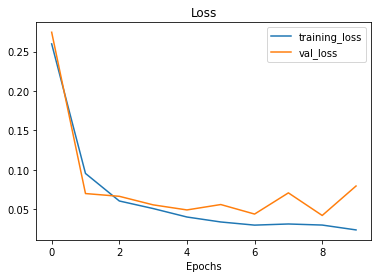

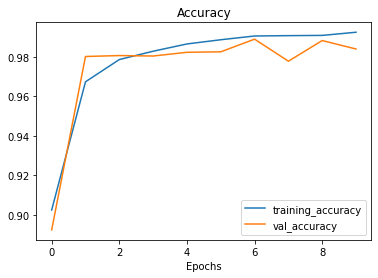

In [10]:
plot_loss_curves(history)

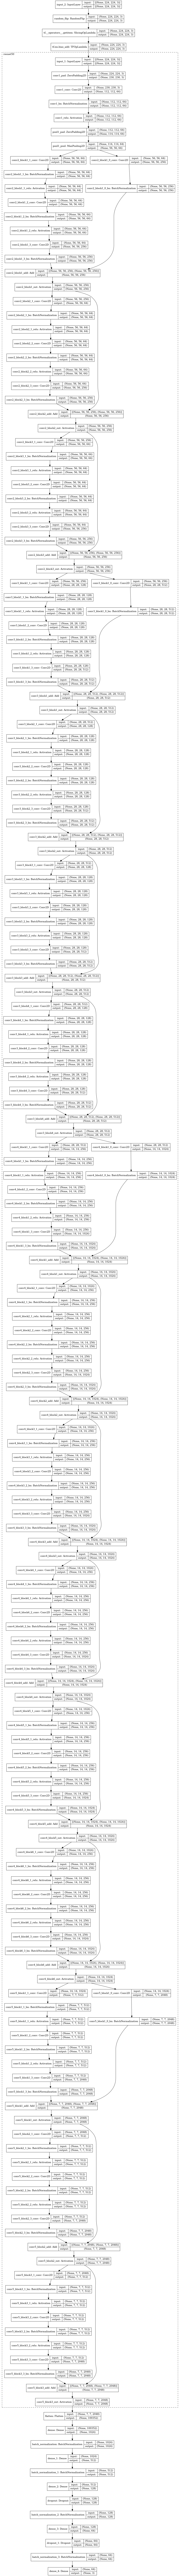

In [11]:
tf.keras.utils.plot_model(model, to_file='resnet50.png',expand_nested=True,show_shapes=True)


In [12]:
Accuracy['ResNet'] = history.history['accuracy'][-1]

In [13]:
# Calculate the Loss and Accuracy on the Validation Data
test_loss, test_acc = model.evaluate(val_dataset)
print('test accuracy : ', test_acc)

132/132 [==============================] - 317s 2s/step - loss: 0.0795 - accuracy: 0.9841
test accuracy :  0.9840666055679321


In [14]:
model.save('resnet50.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
